<a href="https://colab.research.google.com/github/JF11579/New-Stuff/blob/main/CGR_Research_Analyst_Task_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal

Analyze the data of the arrest records of adults of the 14 counties of the Finger Lakes region with an eye to reporting both in its entirty as well as per county; look for differnt trends per crime per county



*   multi line graph for all crimes over time--each crime is different line-- over time
*   line graph per crime comparing counties: is murder going up in one county but down in all others?

*   Report on crime by RACE| Ethnicity per crime 
*   Report on crime by RACE| Ethnicity per crime  and per county:  is Race X commiting more murders in some counties more than others.

*   in the bottom right corner of each graph cite data source
*   Look at only 2016 and 2019.  but maybe do all 4 years and filter out only '16&'19

*   Give the created data set
*   List item









# Options

In [172]:
options(scipen=999)

options(repr.plot.width=14, repr.plot.height=10)

# Packages

In [173]:
library(tidyverse)
library(ggplot2)


# Data Gender

In [174]:
gender <- read.csv("/content/CGR_practice_gender - Both_Years.csv")

In [142]:
head(gender,4)

,year,county,gender,Total.Arrests,Felony.Total,Drug,Violent,DWI,Other,Misdemeanor.Total,Drug.1,DWI.1,Property,Other.1
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2016,Cayuga,both,"1,374",431,51,104,38,238,943,77,173,316,377
2,2016,Cayuga,Male,969,326,36,88,25,177,643,59,125,201,258
3,2016,Cayuga,Female,405,105,15,16,13,61,300,18,48,115,119
4,2016,Cayuga,Not Reported,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
tail(gender,12)

In [127]:
str(gender)

'data.frame':	120 obs. of  14 variables:
 $ year             : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ county           : chr  "Cayuga" "Cayuga" "Cayuga" "Cayuga" ...
 $ gender           : chr  "both" "Male" "Female" "Not Reported" ...
 $ Total.Arrests    : chr  "1,374" "969" "405" "1" ...
 $ Felony.Total     : chr  "431" "326" "105" "0" ...
 $ Drug             : chr  "51" "36" "15" "0" ...
 $ Violent          : chr  "104" "88" "16" "0" ...
 $ DWI              : chr  "38" "25" "13" "0" ...
 $ Other            : chr  "238" "177" "61" "0" ...
 $ Misdemeanor.Total: chr  "943" "643" "300" "0" ...
 $ Drug.1           : chr  "77" "59" "18" "0" ...
 $ DWI.1            : chr  "173" "125" "48" "0" ...
 $ Property         : chr  "316" "201" "115" "0" ...
 $ Other.1          : chr  "377" "258" "119" "0" ...


*** Total.Arrests***  came in as a  character prbably becasue of the commas.

In [175]:
gender$Total.Arrests <- as.numeric(gsub("," , "",gender$Total.Arrests))

In [ ]:
#gender$year <- as.factor(gender$year)

In [ ]:
str(gender)

# GENDER SECTION

## Total Arrests Section

In [144]:
Nineteen <- gender %>%
          filter(year == '2019', gender == 'both')

In [ ]:
Nineteen 

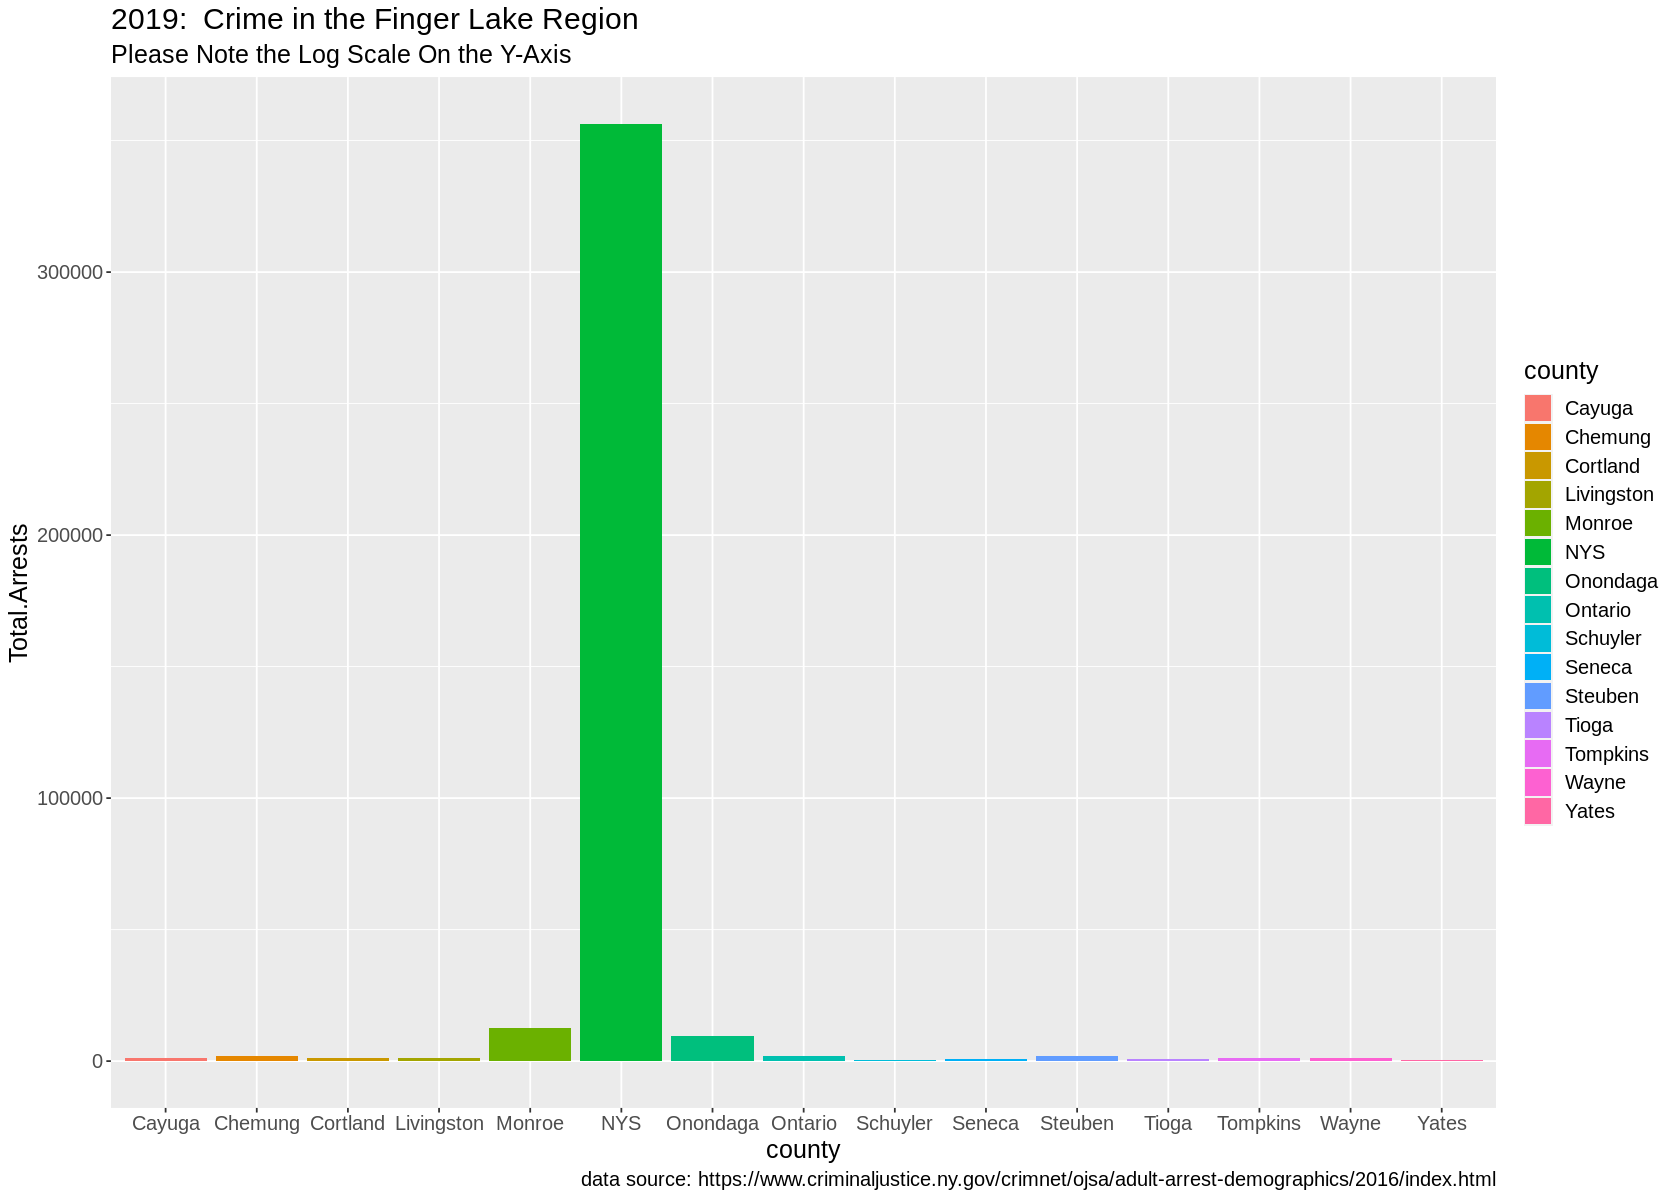

In [156]:
total_arrests_plot_1 <- ggplot(Nineteen , aes(x=county, y = Total.Arrests ,fill = county ))+
              geom_bar(stat = "identity", position = "dodge") +
              labs(title =  "2019:  Crime in the Finger Lake Region",
                    subtitle = "Please Note the Log Scale On the Y-Axis",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html") +
                    theme(text = element_text(size = 15))  
total_arrests_plot_1

Hmmmm.  Let try  logging the Y-axis.

There is such an enormous difference between the NYS total and the individual counties that the  counties becomme obscured. The solution is to scale the Y-axis to log10 ***BUT*** there is an adjustment that will need to be done.  The log10 of 0 is negative infinity which will make the graph look *really* bad.  The solution is to arbitrarily add "1" to any zero.  This is not as bad as it sounds becasue our original sin was conturting the graph quite a bit already to make the states visible.  

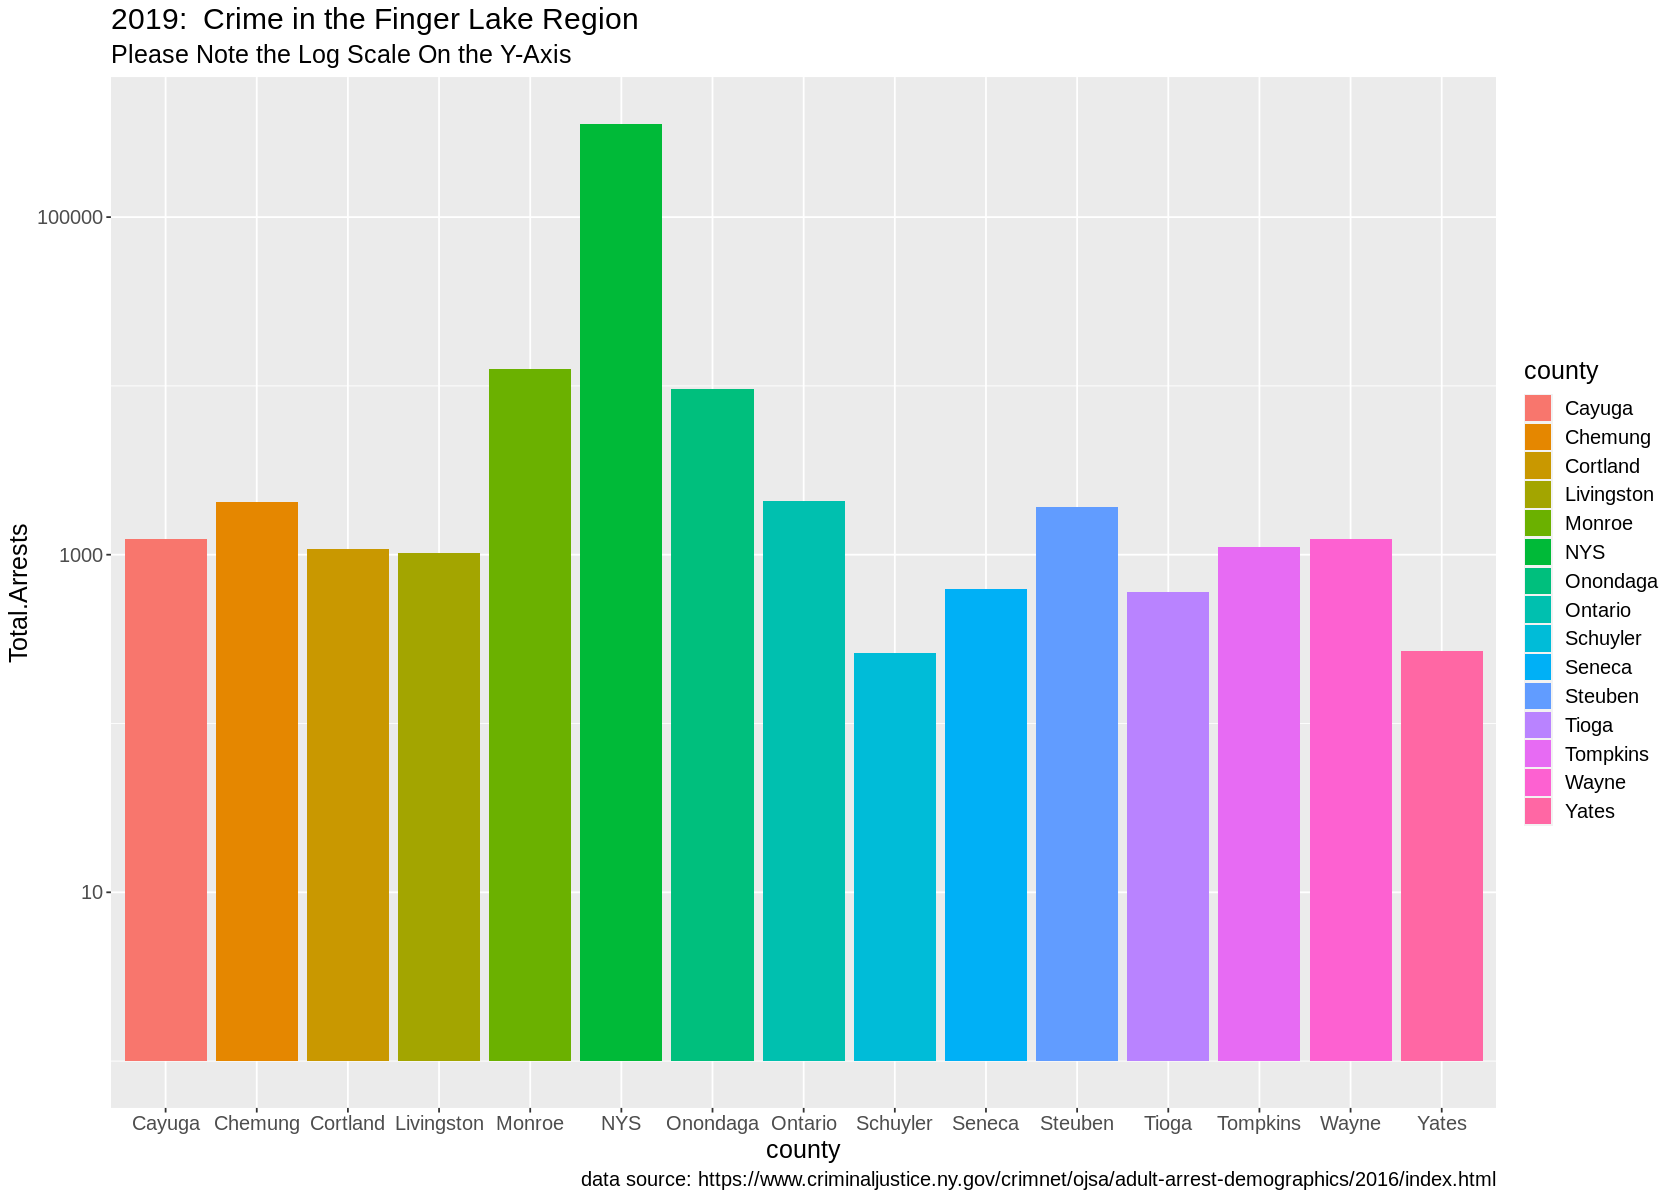

In [157]:
total_arrests_plot_2 <- total_arrests_plot_1 +
                        scale_y_log10()
total_arrests_plot_2


## Change In Each County 2016 to 2019

In [ ]:
#https://www.learnbyexample.org/r-bar-plot-ggplot2/



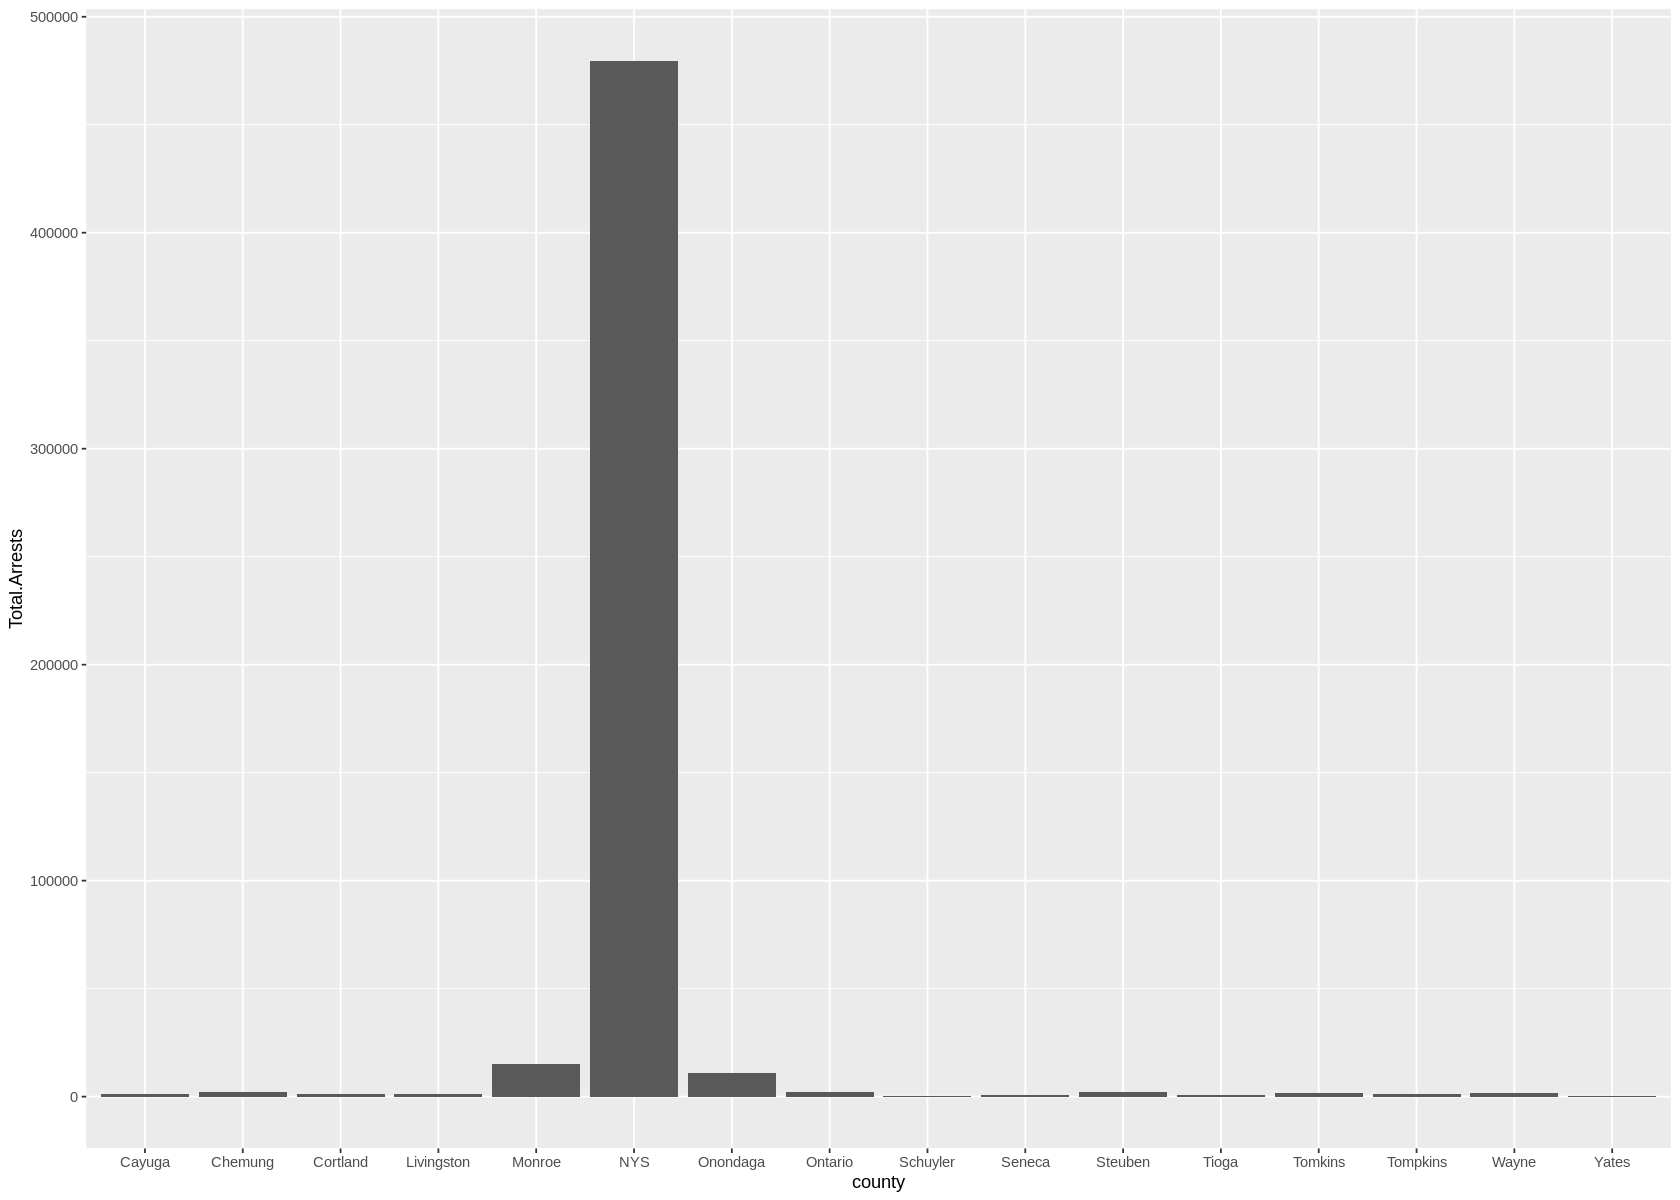

In [158]:
County_Change_1 <- ggplot(gender) +
      geom_col(aes(x= county, y = Total.Arrests ,  group = county ) , position = "dodge") 
County_Change_1

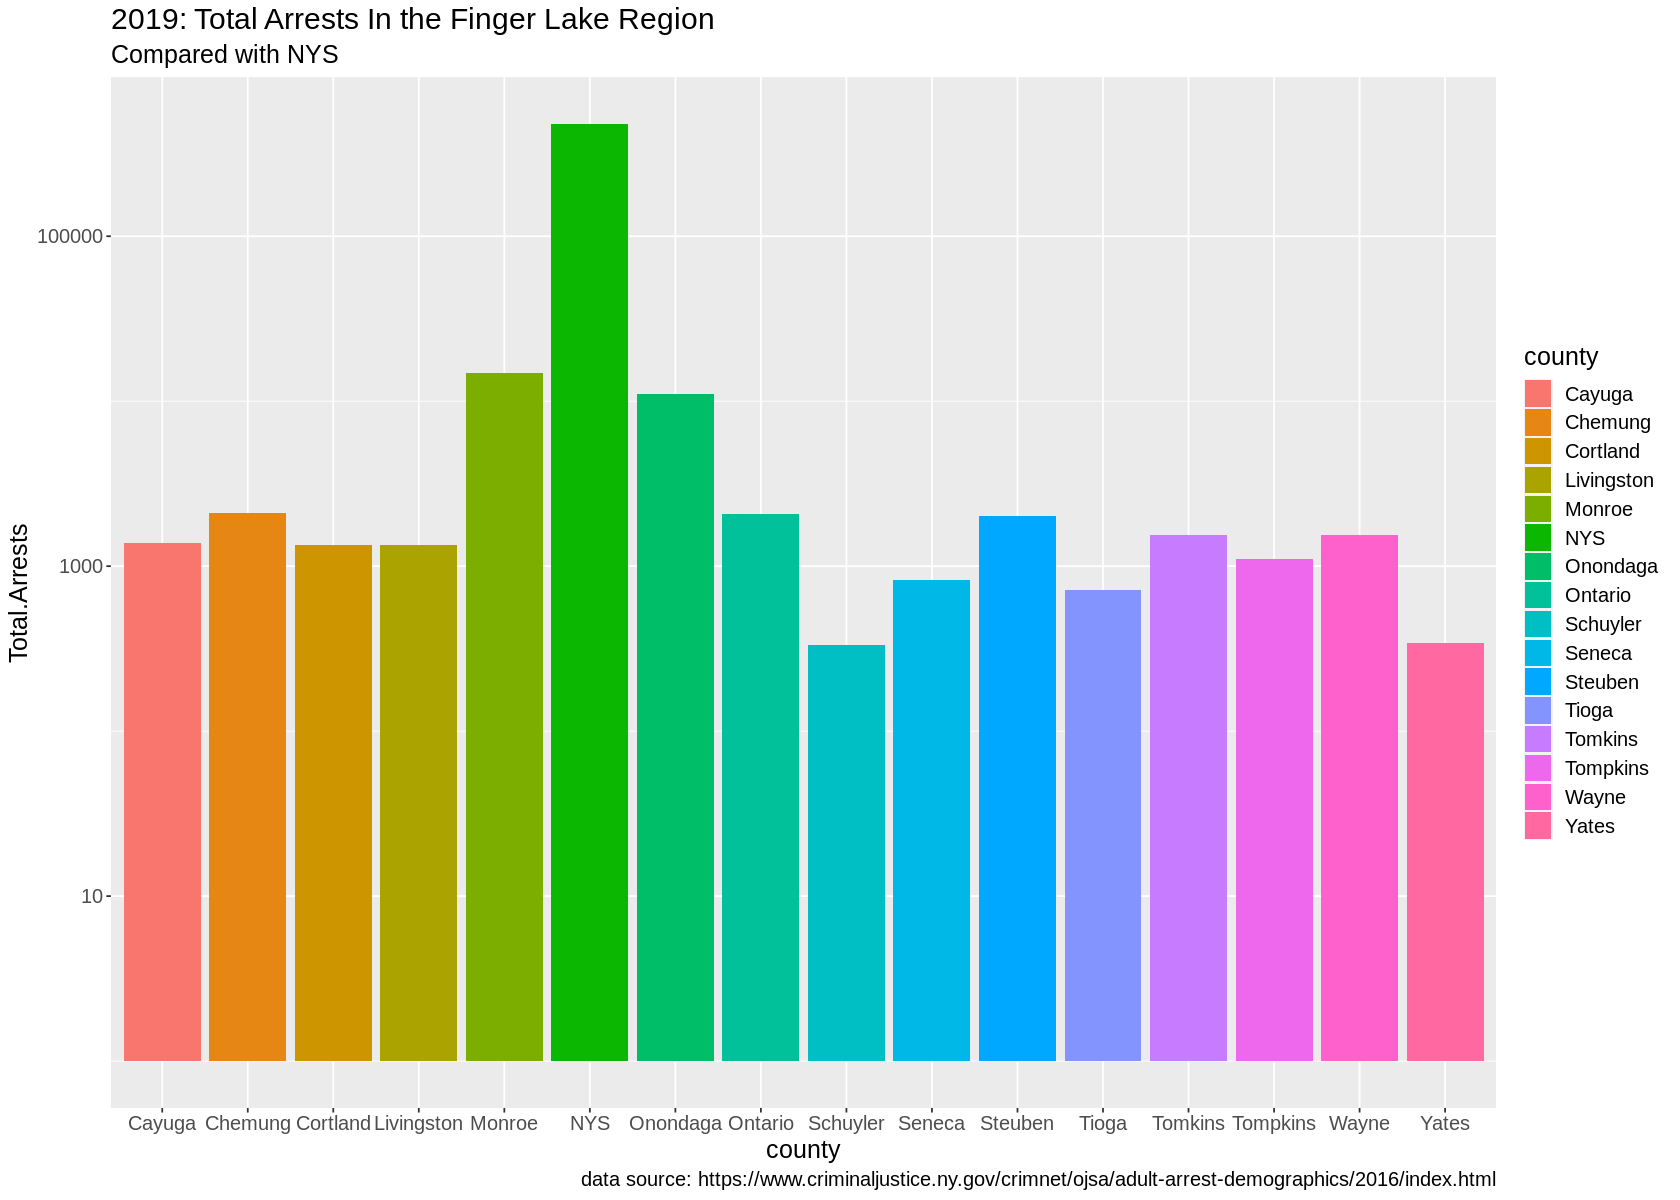

In [177]:
County_Change_2 <- ggplot(gender) +
      geom_col(aes(x= county, y = Total.Arrests ,  group = county ,fill = county) , position = "dodge") +
      scale_y_log10() +
      labs(title =  "2019: Total Arrests In the Finger Lake Region",
                    subtitle = "Compared with NYS",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html") +
                    theme(text = element_text(size = 15)) 
County_Change_2

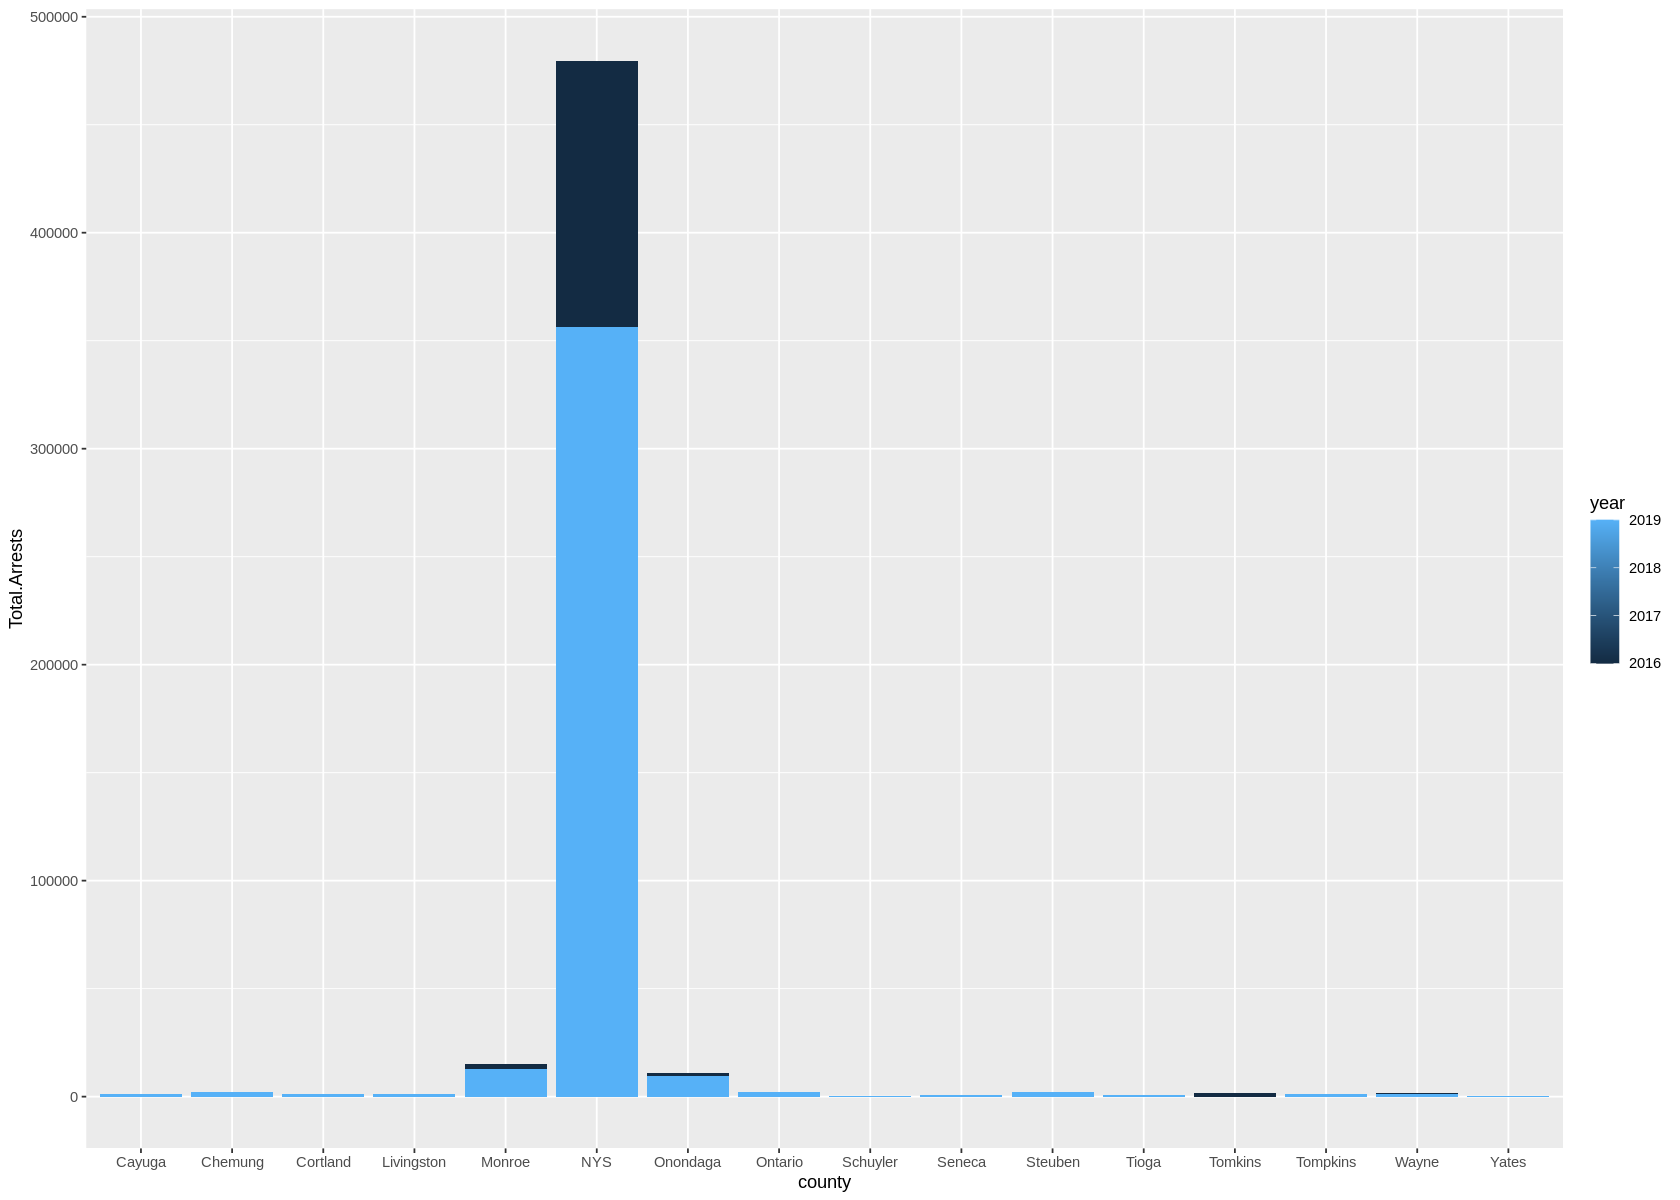

In [179]:
County_Change_4 <- ggplot(gender,aes(x = county , y = Total.Arrests, fill = year ,position = "dodge")) +
                  geom_bar(stat = "identity" , position=position_dodge()) 
County_Change_4

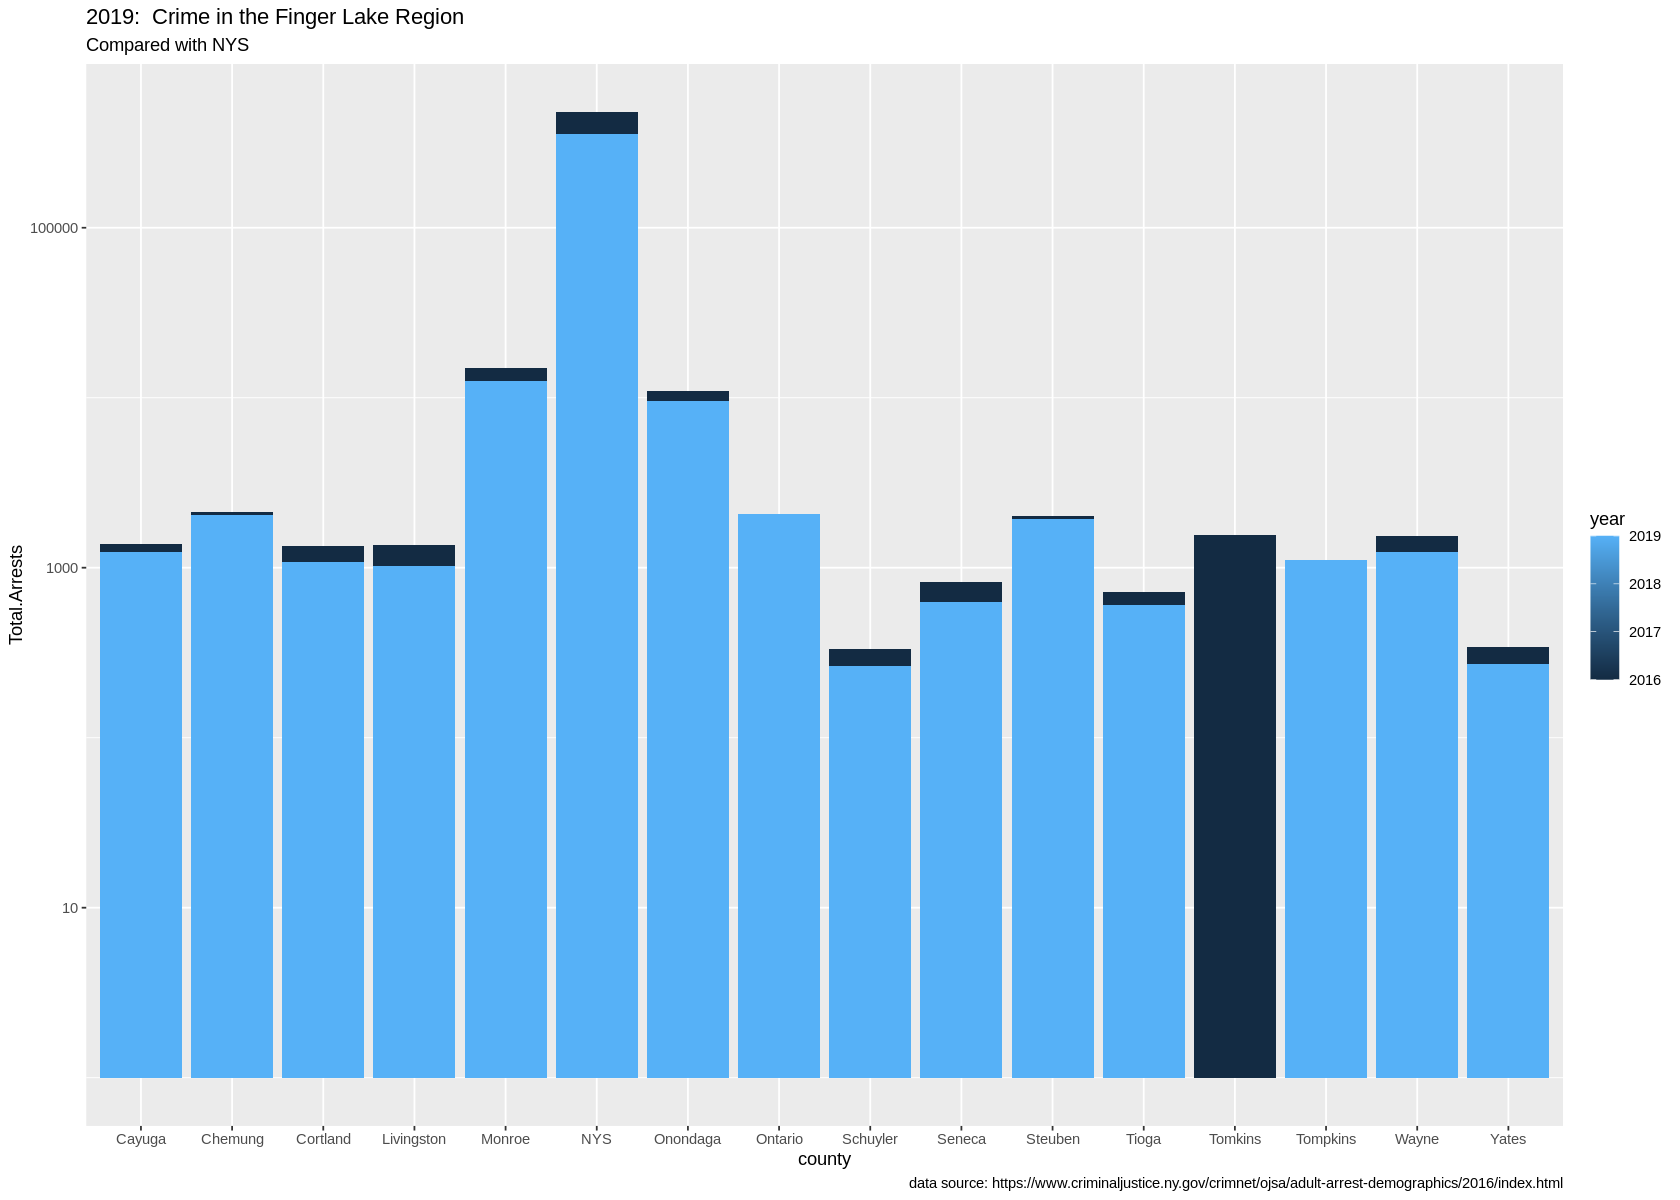

In [181]:
County_Change_3 <- ggplot(gender,aes(x = county , y = Total.Arrests, fill = year )) +
                  geom_bar(stat = "identity" , position=position_dodge()) +
                  scale_y_log10() +
                  labs(title =  "2019:  Crime in the Finger Lake Region",
                    subtitle = "Compared with NYS",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html") 
                   
County_Change_3

Grouped bar chart where each county has 2 bars

## Total Arrests By Gender


In [ ]:
NYS <- gender %>%
            filter(county == "NYS" )
NYS

year,county,gender,Total.Arrests,Felony.Total,Drug,Violent,DWI,Other,Misdemeanor.Total,Drug.1,DWI.1,Property,Other.1
<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2016,NYS,both,479547,"150,610","25,510","40,384","5,603","79,113","328,937","65,595","33,992","114,387","114,963"
2016,NYS,Male,373291,"123,118","21,619","32,974","4,423","64,102","250,173","53,725","25,823","82,665","87,960"
2016,NYS,Female,106087,"27,442","3,881","7,399","1,176","14,986","78,645","11,860","8,152","31,670","26,963"
2016,NYS,Not Reported,169,50,10,11,4,25,119,10,17,52,40
2019,NYS,both,356333,"125,663","19,332","34,019","5,056","67,256","230,670","37,919","28,744","70,676","93,331"
2019,NYS,Male,272447,"102,516","16,384","27,606","3,828","54,698","169,931","29,635","21,292","47,947","71,057"
2019,NYS,Female,83760,"23,106","2,944","6,407","1,225","12,530","60,654","8,270","7,435","22,702","22,247"
2019,NYS,Not Reported,126,41,4,6,3,28,85,14,17,27,27


In [ ]:
NYS_Gender <- NYS %>%
            filter(gender == "Male"| gender == "Female")
NYS_Gender           

year,county,gender,Total.Arrests,Felony.Total,Drug,Violent,DWI,Other,Misdemeanor.Total,Drug.1,DWI.1,Property,Other.1
<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2016,NYS,Male,373291,"123,118","21,619","32,974","4,423","64,102","250,173","53,725","25,823","82,665","87,960"
2016,NYS,Female,106087,"27,442","3,881","7,399","1,176","14,986","78,645","11,860","8,152","31,670","26,963"
2019,NYS,Male,272447,"102,516","16,384","27,606","3,828","54,698","169,931","29,635","21,292","47,947","71,057"
2019,NYS,Female,83760,"23,106","2,944","6,407","1,225","12,530","60,654","8,270","7,435","22,702","22,247"


In [ ]:
NYS_Gender_2016 <- NYS_Gender %>%
            filter(year == "2016")
NYS_Gender_2016 

year,county,gender,Total.Arrests,Felony.Total,Drug,Violent,DWI,Other,Misdemeanor.Total,Drug.1,DWI.1,Property,Other.1
<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2016,NYS,Male,373291,"123,118","21,619","32,974","4,423","64,102","250,173","53,725","25,823","82,665","87,960"
2016,NYS,Female,106087,"27,442","3,881","7,399","1,176","14,986","78,645","11,860","8,152","31,670","26,963"


In [ ]:
NYS_Gender_2016_Select <- NYS_Gender_2016 %>% select(gender , Total.Arrests)
NYS_Gender_2016_Select

gender,Total.Arrests
<chr>,<dbl>
Male,373291
Female,106087


In [ ]:
NYS_Gender_2019 <- NYS_Gender %>%
            filter(year == "2019")
NYS_Gender_2019 

year,county,gender,Total.Arrests,Felony.Total,Drug,Violent,DWI,Other,Misdemeanor.Total,Drug.1,DWI.1,Property,Other.1
<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2019,NYS,Male,272447,"102,516","16,384","27,606","3,828","54,698","169,931","29,635","21,292","47,947","71,057"
2019,NYS,Female,83760,"23,106","2,944","6,407","1,225","12,530","60,654","8,270","7,435","22,702","22,247"


In [ ]:
NYS_Gender_2019_Select <- NYS_Gender_2019 %>% select(gender , Total.Arrests)
NYS_Gender_2019_Select

gender,Total.Arrests
<chr>,<dbl>
Male,272447
Female,83760


In [ ]:
NYS_Gender_2016 

year,county,gender,Total.Arrests,Felony.Total,Drug,Violent,DWI,Other,Misdemeanor.Total,Drug.1,DWI.1,Property,Other.1
<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2016,NYS,Male,373291,"123,118","21,619","32,974","4,423","64,102","250,173","53,725","25,823","82,665","87,960"
2016,NYS,Female,106087,"27,442","3,881","7,399","1,176","14,986","78,645","11,860","8,152","31,670","26,963"


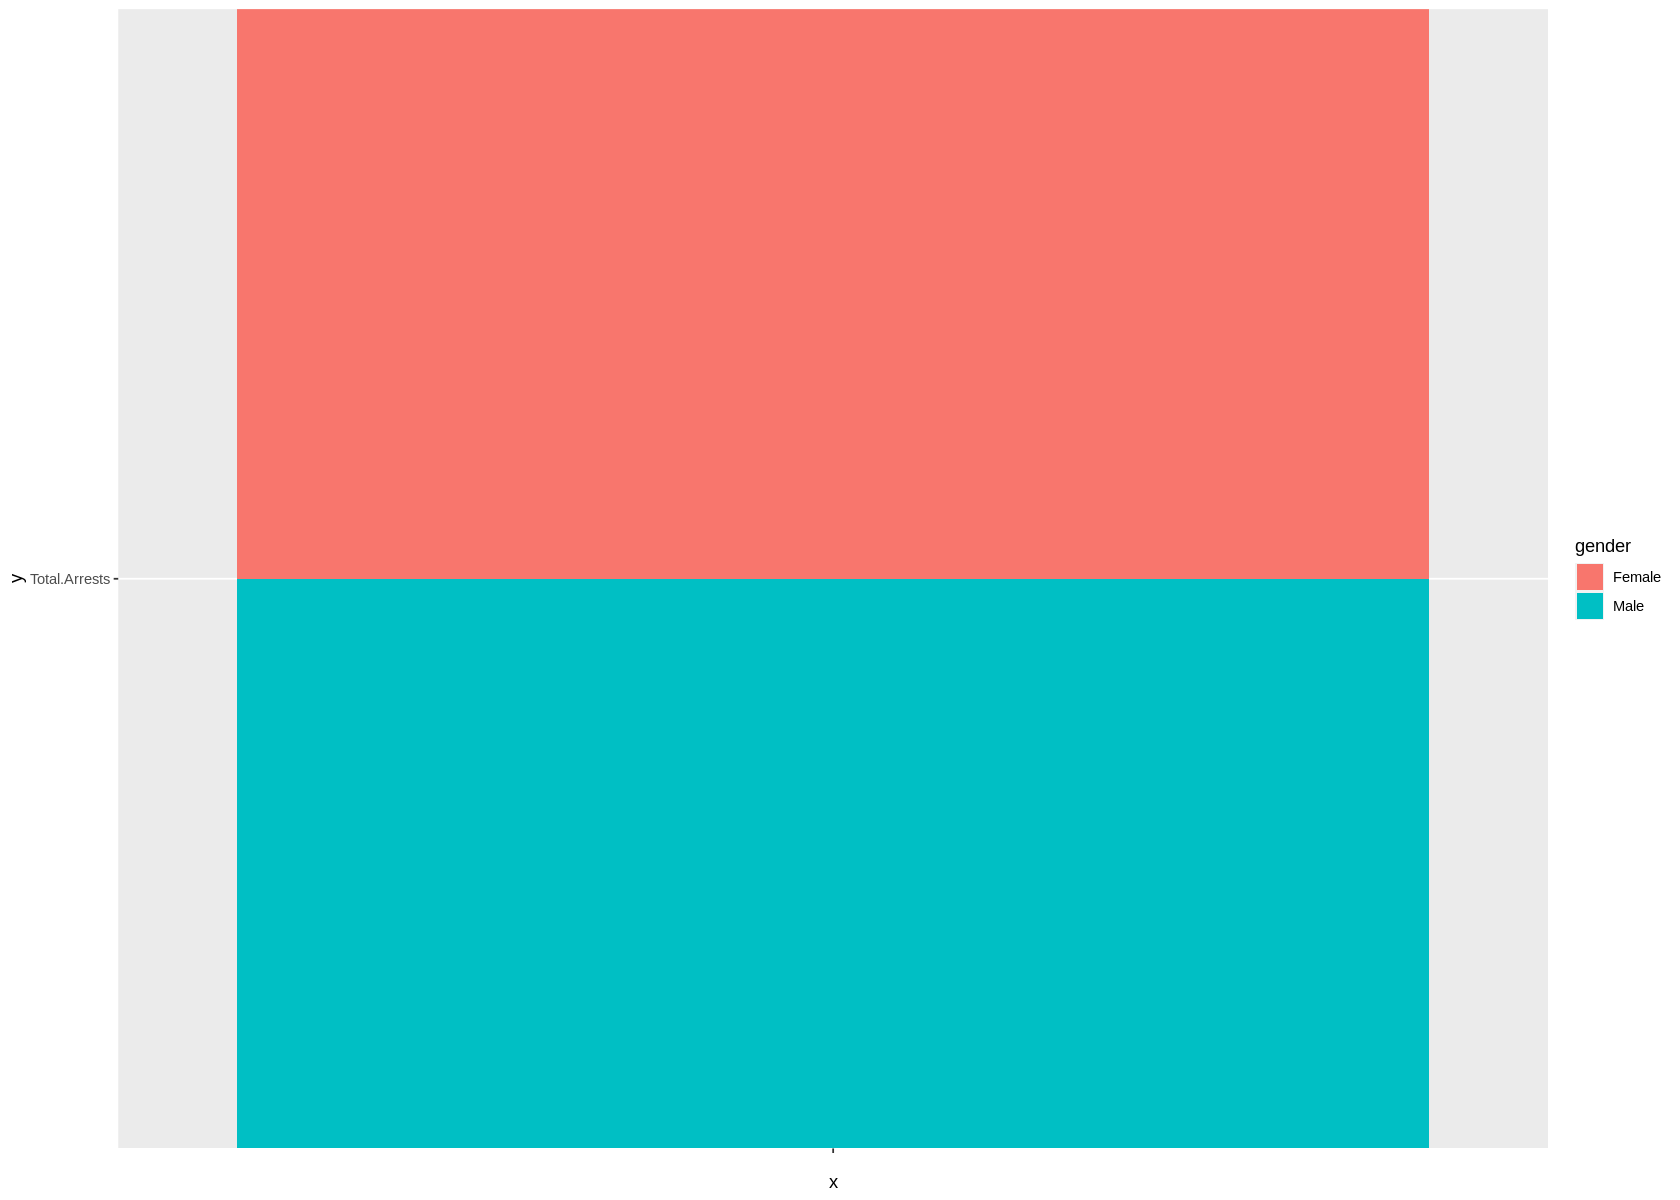

In [ ]:
NYS_Gender_2016_Bar <- ggplot(NYS_Gender_2016_Select  , aes(x = "", y = "Total.Arrests" , fill = gender )) +
                      geom_bar(width = 1, stat = "identity")
NYS_Gender_2016_Bar

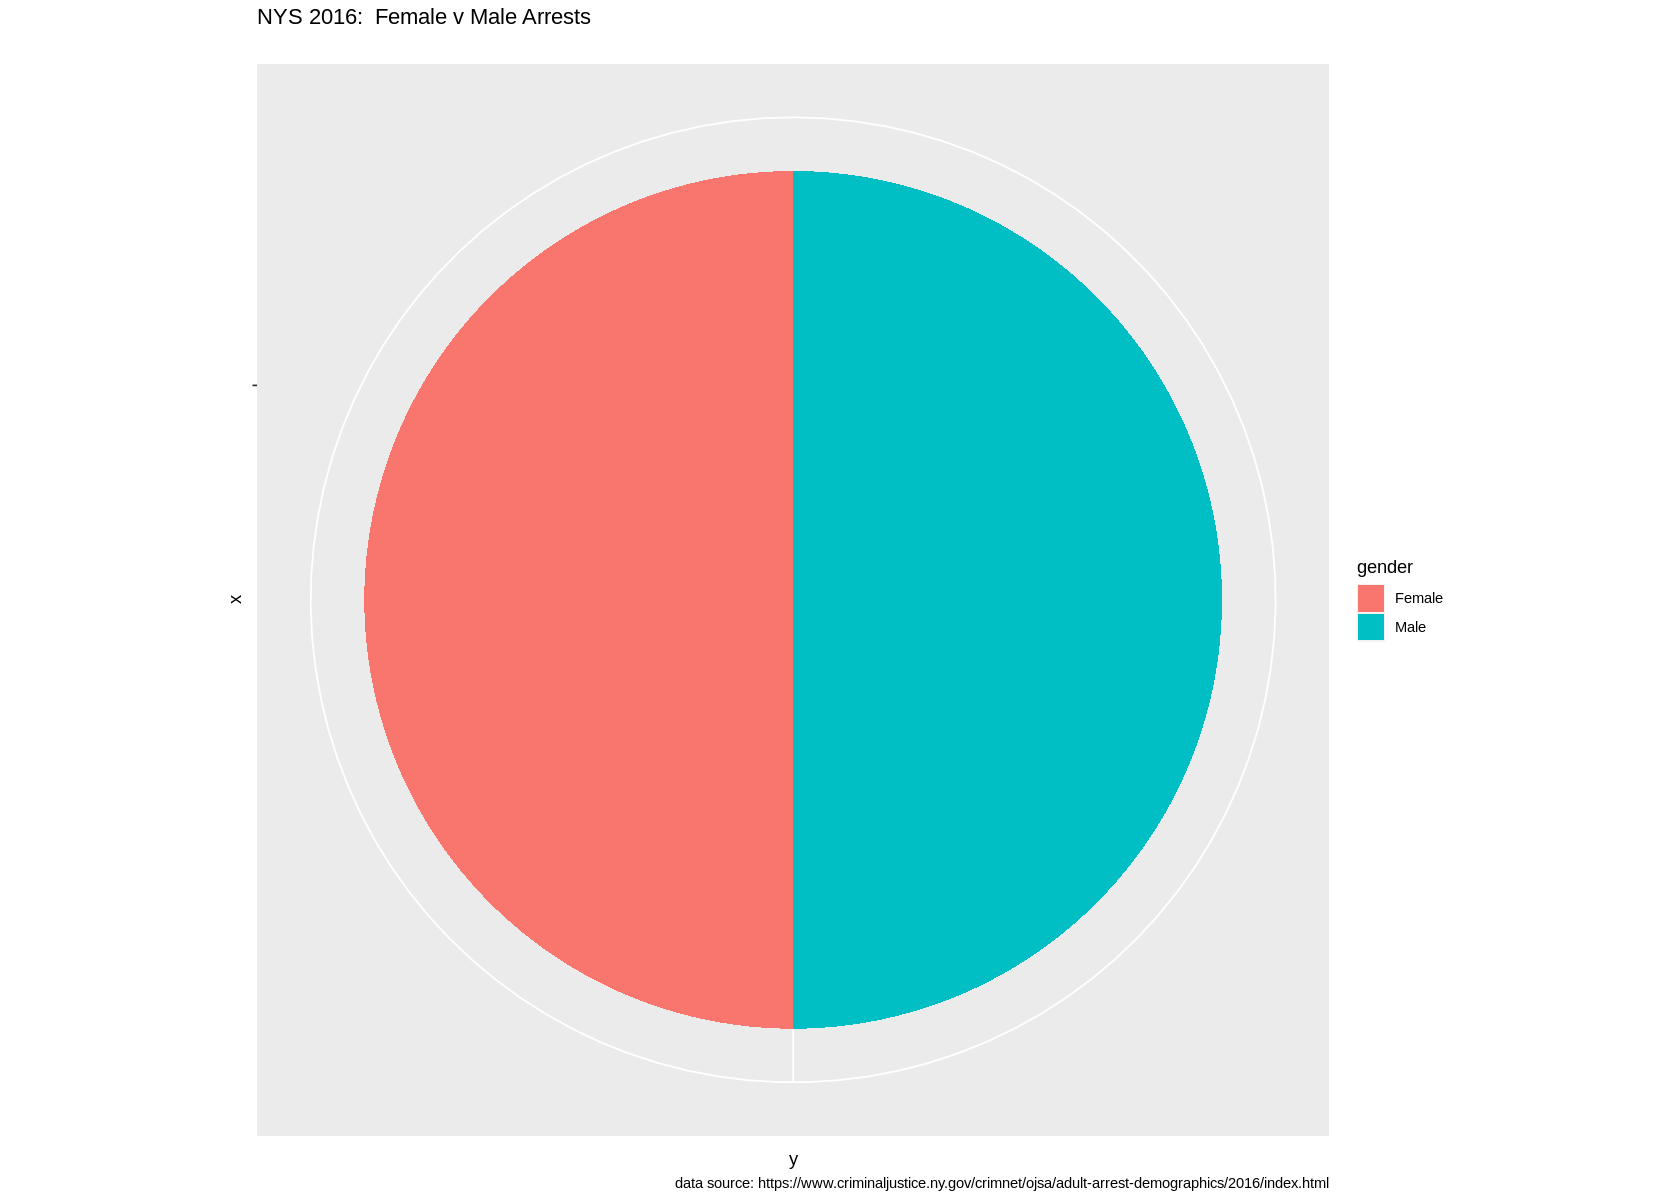

In [ ]:
NYS_Gender_2016_Pie <- NYS_Gender_2016_Bar + coord_polar("y", start=0) +
labs(title =  "NYS 2016:  Female v Male Arrests",
                    subtitle = "",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html")
NYS_Gender_2016_Pie

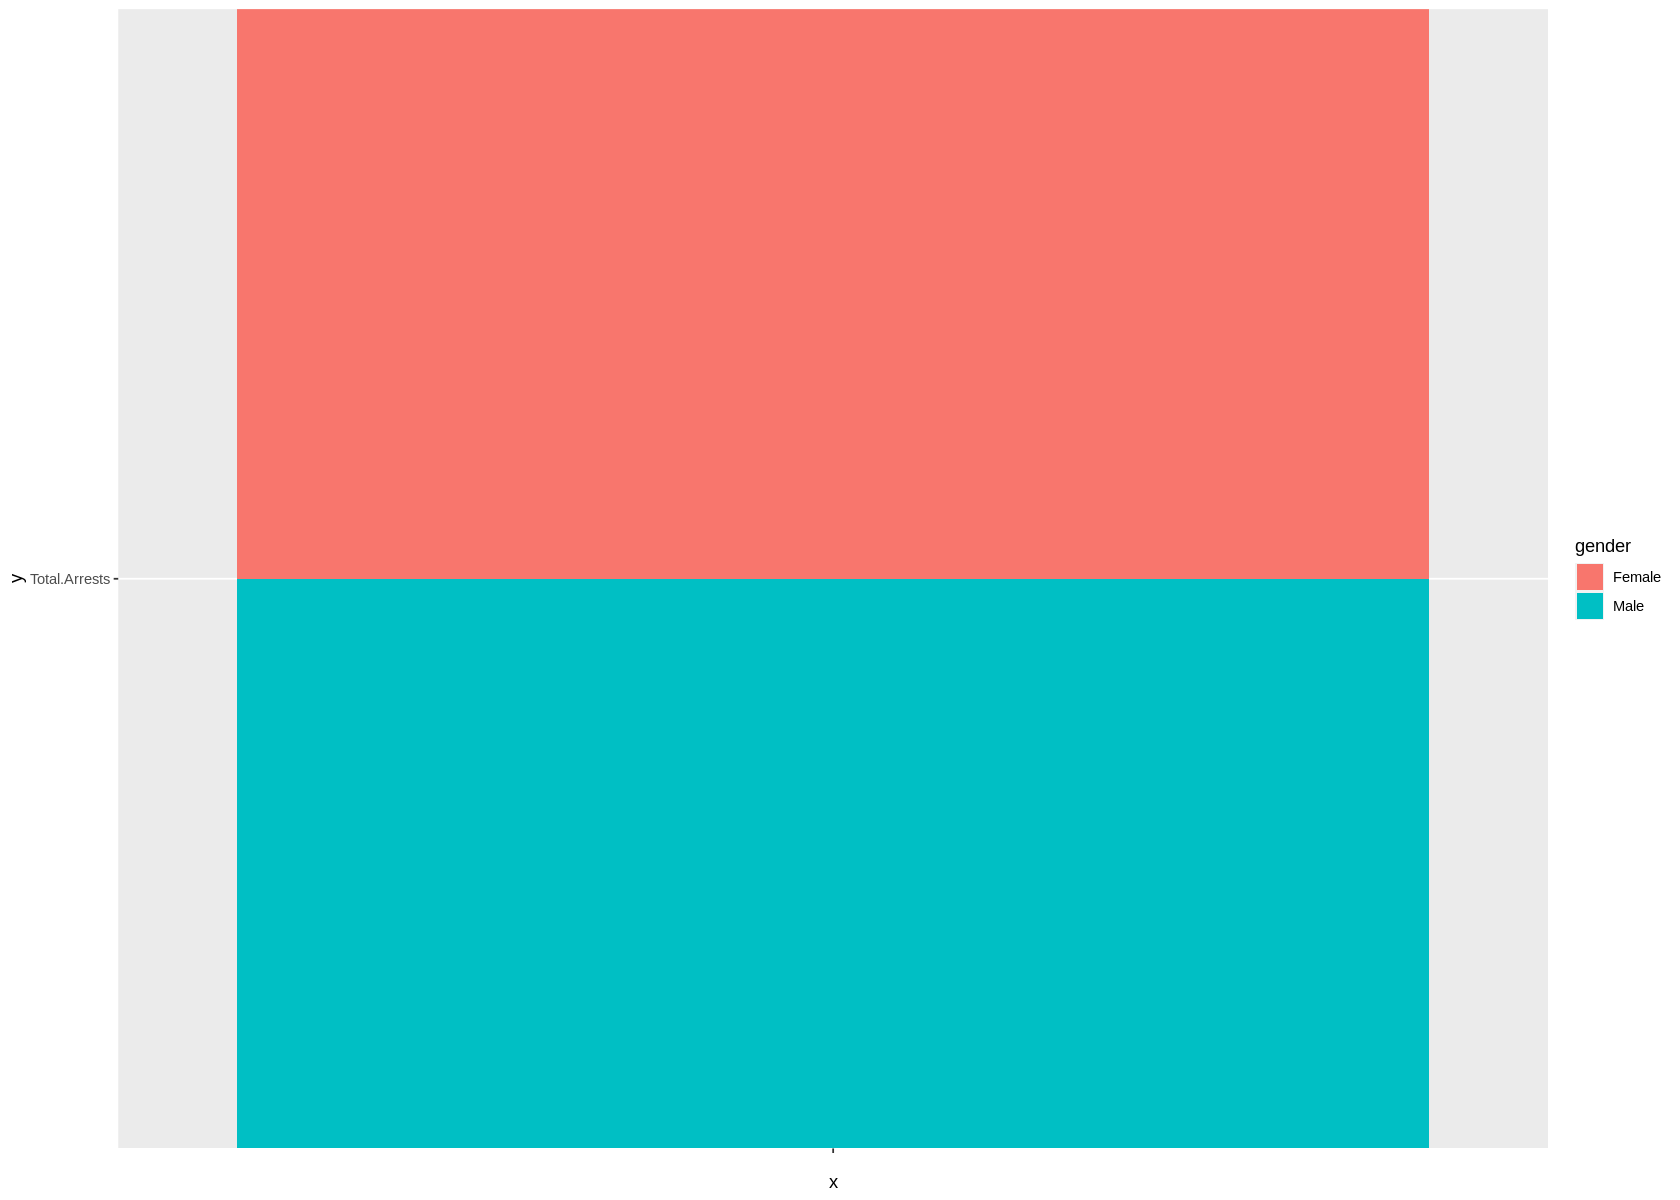

In [ ]:
NYS_Gender_2019_Bar <- ggplot(NYS_Gender_2019_Select  , aes(x = "", y = "Total.Arrests" , fill = gender )) +
                      geom_bar(width = 1, stat = "identity")
NYS_Gender_2019_Bar

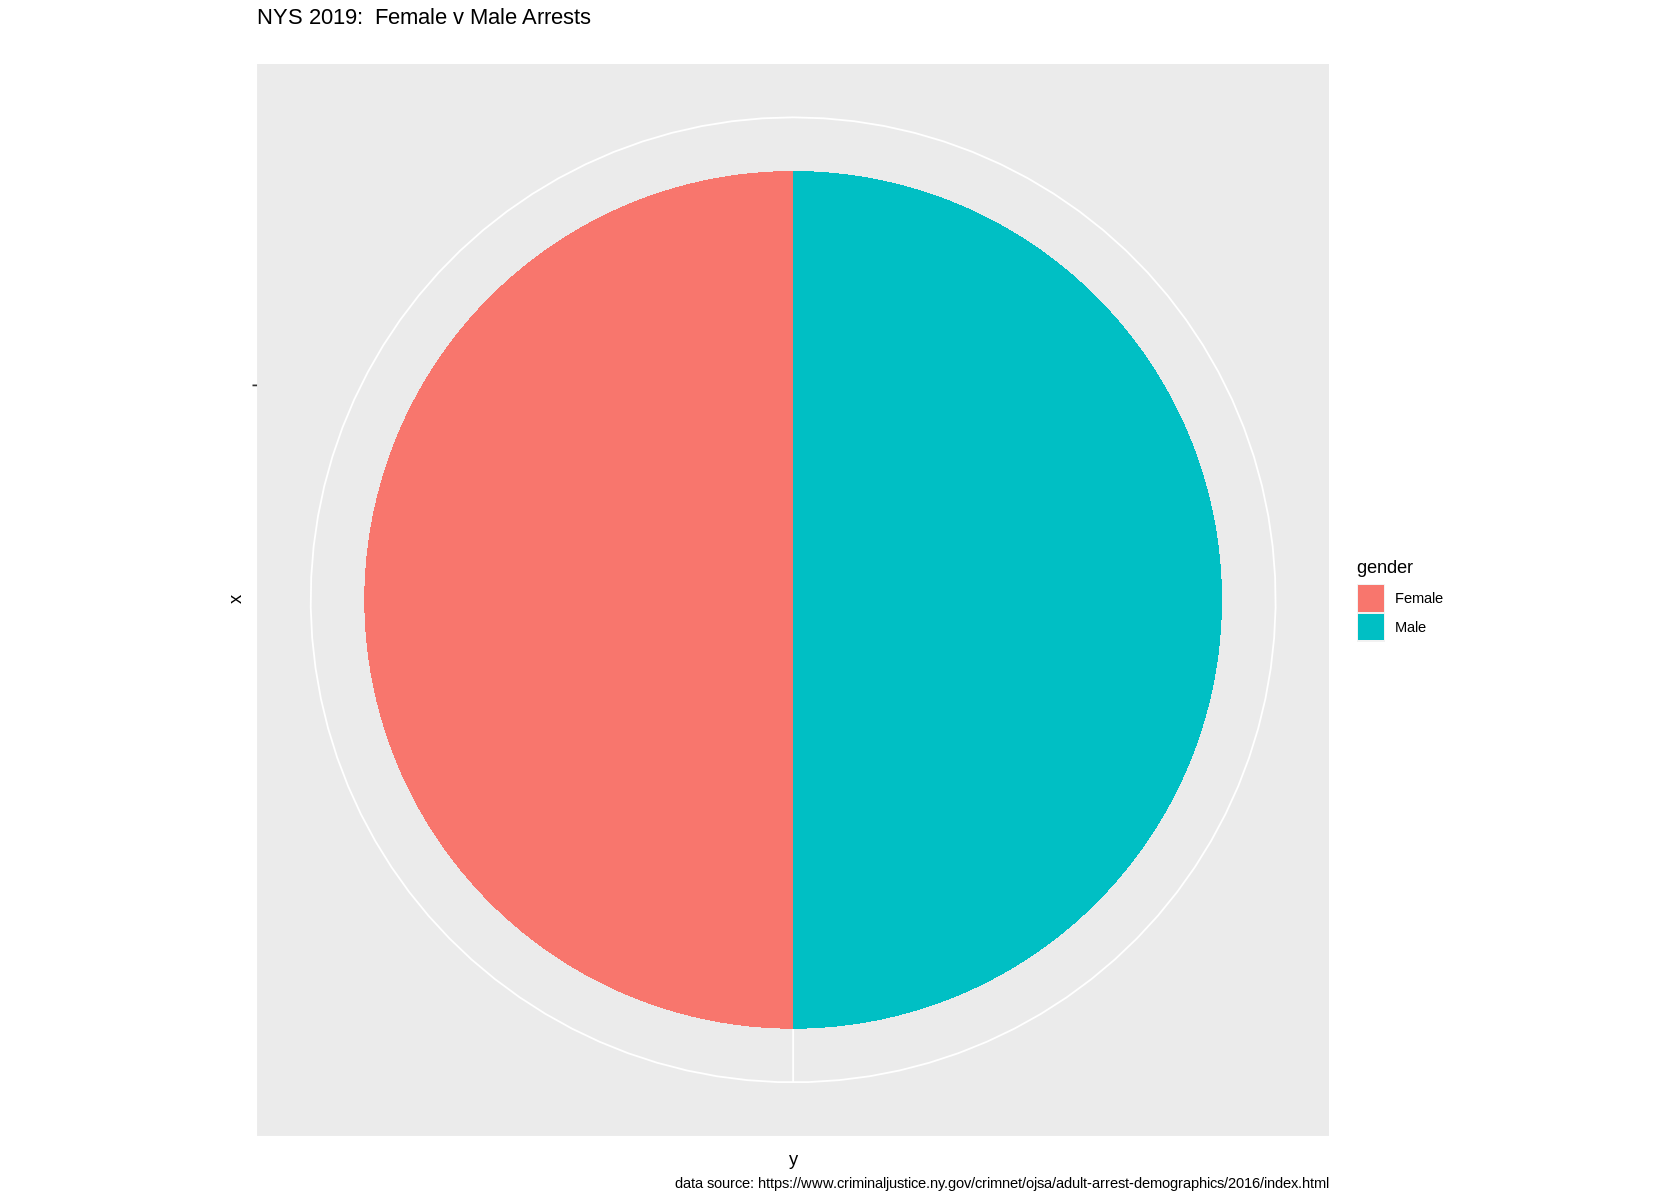

In [ ]:
NYS_Gender_2019_Pie <- NYS_Gender_2019_Bar + coord_polar("y", start=0) +
labs(title =  "NYS 2019:  Female v Male Arrests",
                    subtitle = "",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html")
NYS_Gender_2019_Pie

Stacked Bar Graph comparing the gender of those arrested by state.

In [164]:
Gender_by_County <- gender %>%
            filter(gender == "Male"| gender == "Female")
 

In [165]:
Gender_by_County <- Gender_by_County[!(Gender_by_County$county == "NYS") ,]

In [166]:
head(Gender_by_County,4)

,year,county,gender,Total.Arrests,Felony.Total,Drug,Violent,DWI,Other,Misdemeanor.Total,Drug.1,DWI.1,Property,Other.1
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2016,Cayuga,Male,969,326,36,88,25,177,643,59,125,201,258
2,2016,Cayuga,Female,405,105,15,16,13,61,300,18,48,115,119
3,2016,Chemung,Male,1360,366,70,81,37,178,994,146,174,366,308
4,2016,Chemung,Female,755,107,18,22,14,53,648,89,59,358,142


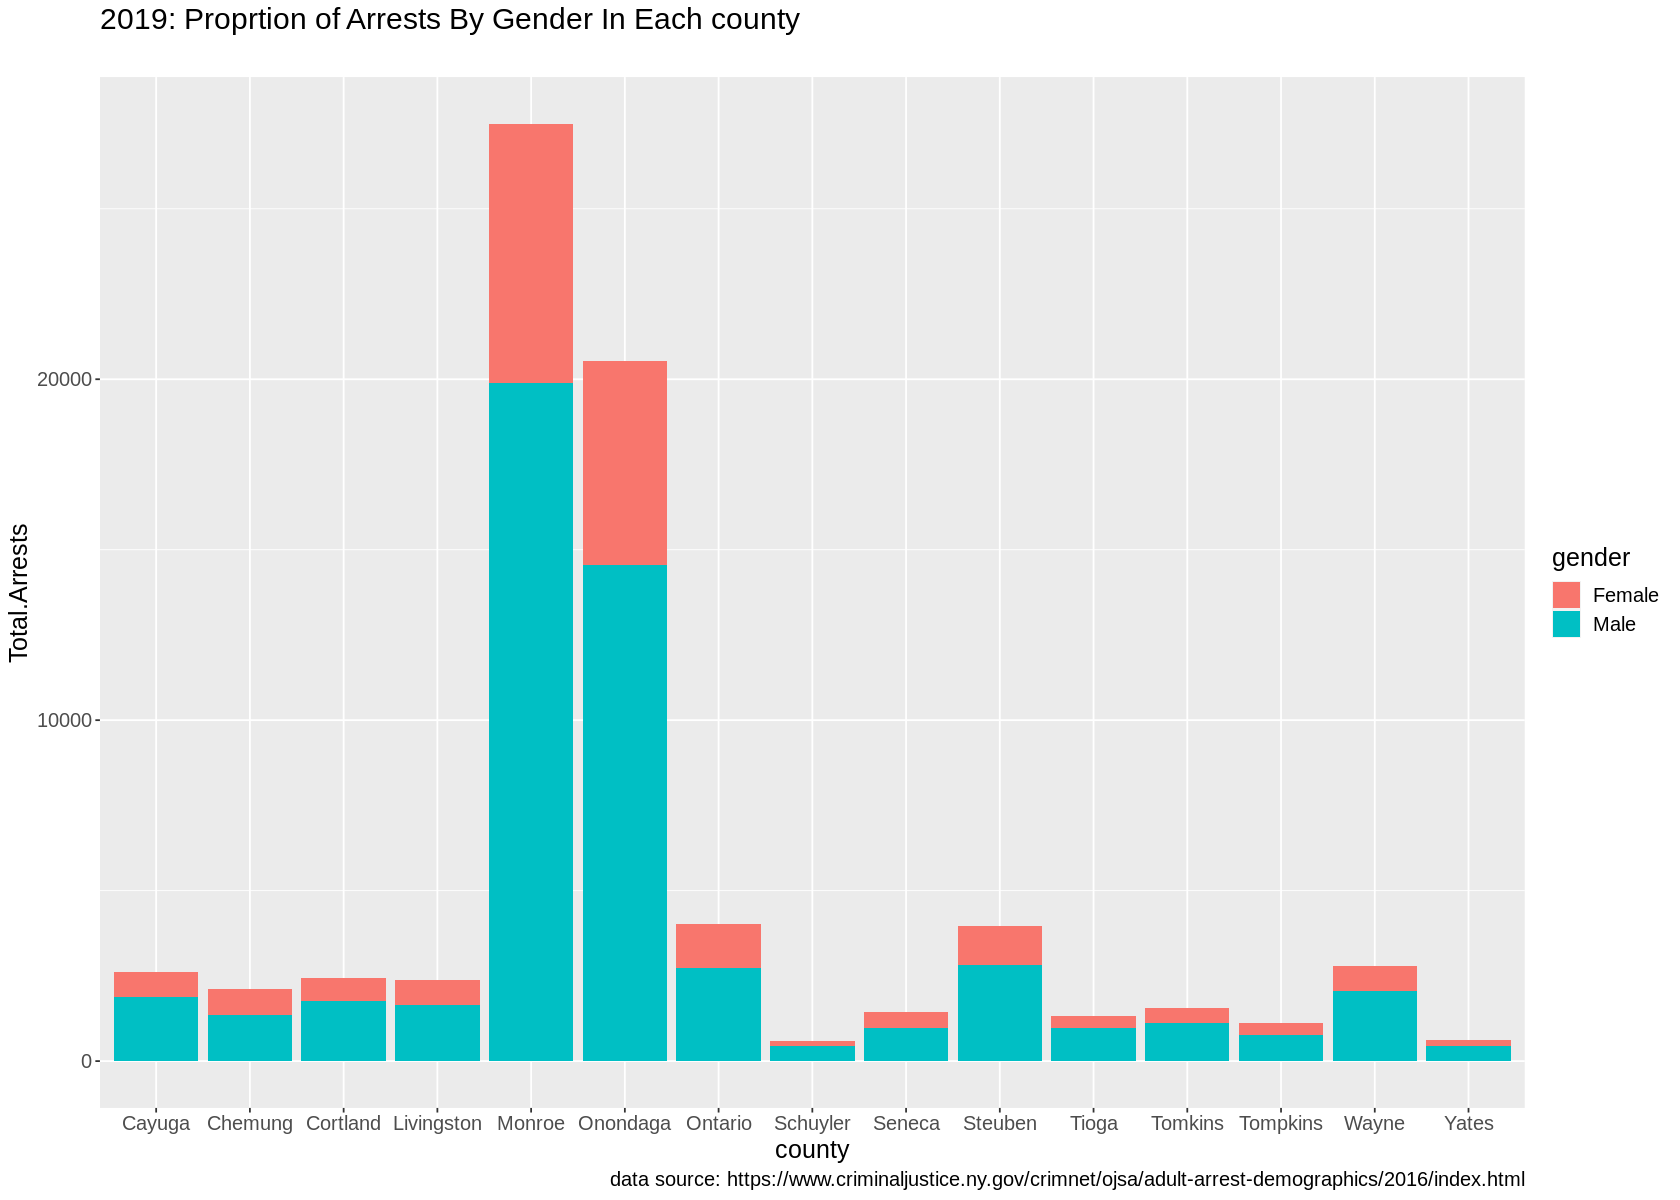

In [169]:
#Gender_by_County_Stacked <- ggplot(data= Gender_by_County , 
                            aes(x = county , y = Total.Arrests , fill = gender)) +
                            geom_bar(stat =  "identity") +
                            labs(title =  "2019: Proprtion of Arrests By Gender In Each county",
                    subtitle = "",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html") +
                    theme(text = element_text(size = 15)) 
Gender_by_County_Stacked 

In [ ]:
#ggplot(ds, aes(gear, fill = gear)) +
  geom_bar() +
  facet_grid(cols = vars(cyl), margins = T) +
  geom_text(aes(label = scales::percent(..prop..), group = 1), stat= "count")

In [ ]:
Gender_by_County_Stacked_2 <- ggplot(data= Gender_by_County , aes(x = county , y = Total.Arrests , fill = gender)) +
                            geom_bar(stat =  "identity")+
                            facect_grid(col)
Gender_by_County_Stacked_2

In [ ]:
https://stackoverflow.com/questions/58744507/how-to-show-percentages-in-stacked-column-with-ggplot-geom-bar

https://stackoverflow.com/questions/60115375/adding-percentage-labels-to-a-barplot-with-y-axis-count-in-r

# Race and Ethnicity

# Data Race & Ethnicity

In [76]:
race <- read.csv("/content/CGR_race_ethnicity_worksheet - Sheet1.csv")

In [ ]:
head(race,20)

In [77]:
#oops forgot to name a col
 race <- rename(race, offense = X)

In [78]:
# Lets convert ot numeric and remove the commas from Total Arrests, Blacks, and Whites
race$Total.Arrests <- as.numeric(gsub("," ,"",race$Total.Arrests ))
race$White <- as.numeric(gsub("," ,"",race$White ))
race$Black <- as.numeric(gsub("," ,"", race$Black ))

In [185]:
head(race)

,county,year,offense,Total.Arrests,White,Black,Hispanic,Asian,Other.Unknown
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,Cayuga,2016,Total Arrests,1374,1071,240,42,2,19
2,Cayuga,2016,Felony Total,431,325,92,12,0,2
3,Cayuga,2016,Drug,51,33,16,1,0,1
4,Cayuga,2016,Violent,104,79,24,1,0,0
5,Cayuga,2016,DWI,38,33,4,0,0,1
6,Cayuga,2016,Other,238,180,48,10,0,0


In [ ]:
str(race)

In [34]:
#Lets change year to factor
#race$year <- as.factor(race$year)

In [ ]:
str(race)

## Make the data long , skinny

In [186]:
race_long <- race %>%
              pivot_longer(cols = c("Total.Arrests",
              "White","Black","Hispanic","Asian","Other.Unknown") ,
              names_to = "group",
              values_to = "number",
              values_ptypes = list(test2=character()))

In [190]:
head(race_long,2)

county,year,offense,group,number
<chr>,<int>,<chr>,<chr>,<dbl>
Cayuga,2016,Total Arrests,Total.Arrests,1374
Cayuga,2016,Total Arrests,White,1071


In [ ]:
tail(race_long)

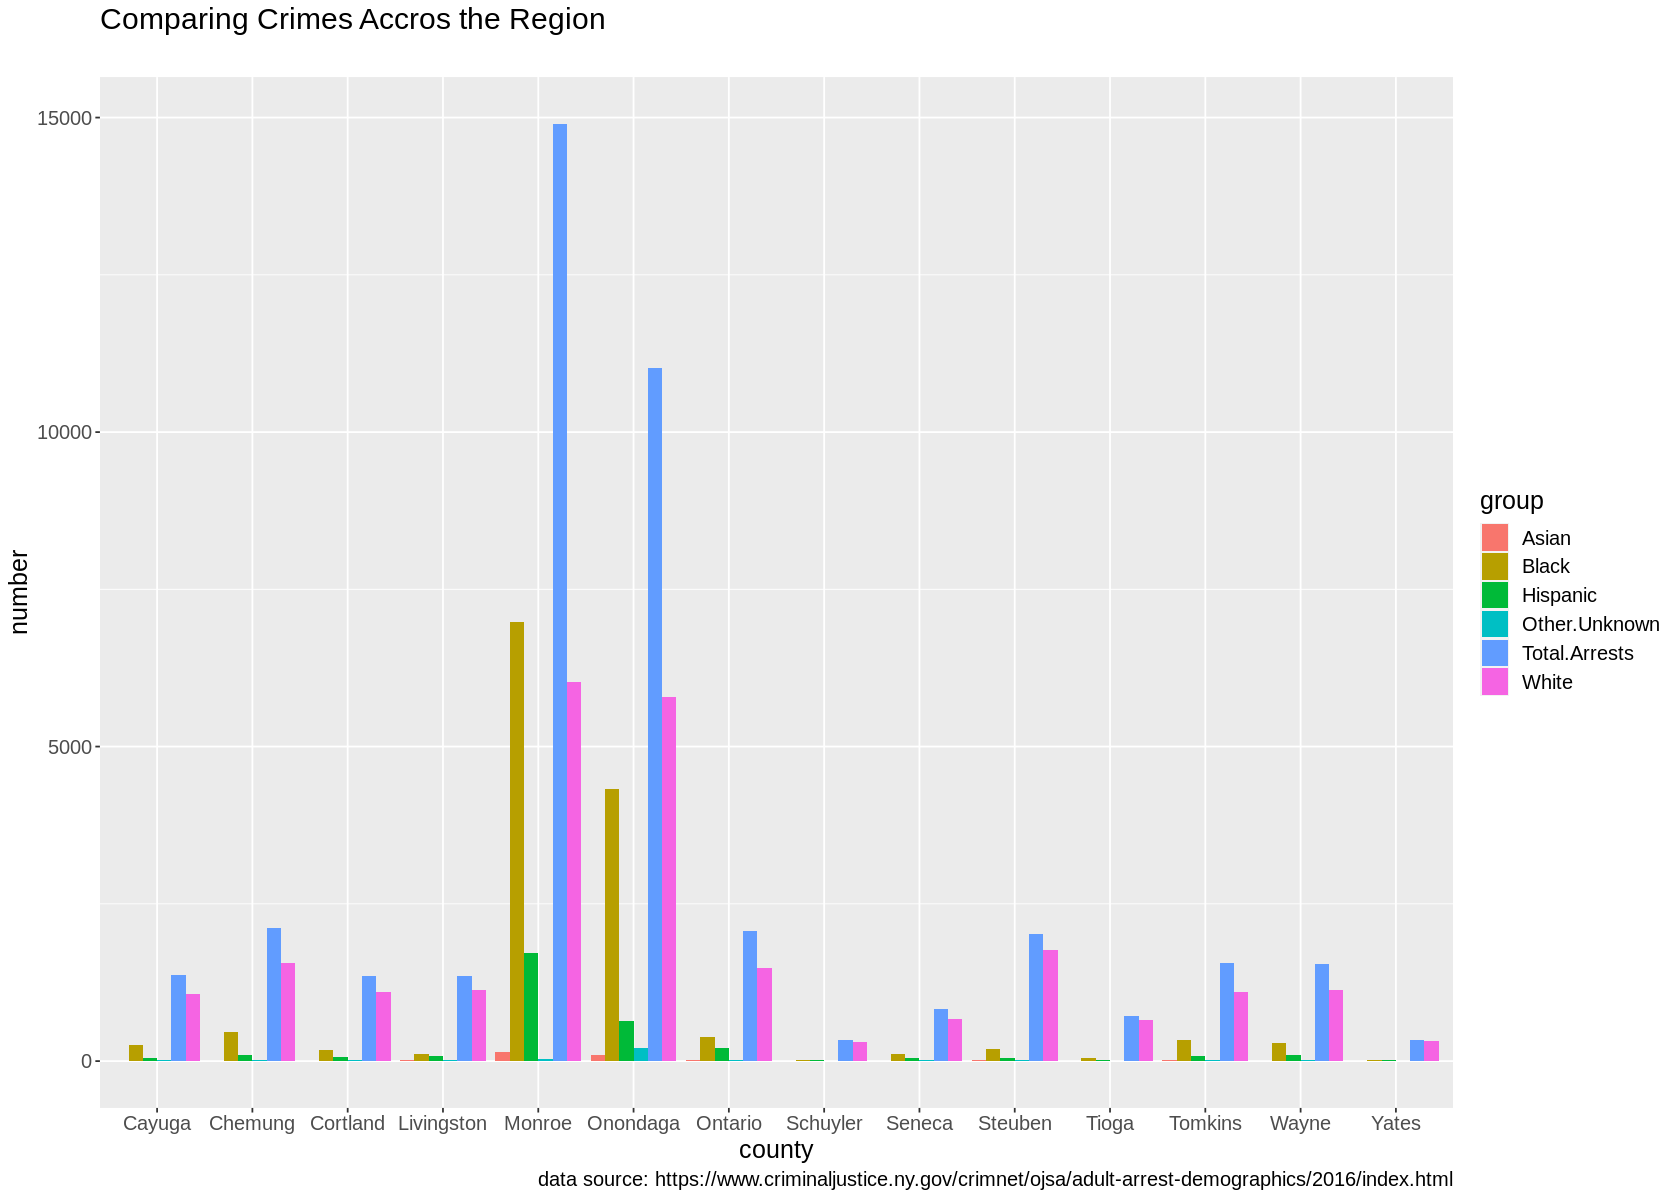

In [198]:
A <- ggplot(race_long, aes( county, number, fill = group ))+
      geom_bar(stat="identity", position=position_dodge()) +
      labs(title =  "Comparing Crimes Accros the Region",
                    subtitle = "",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html") +
                    theme(text = element_text(size = 15)) 

A

## Plotting Race and Ethnicity

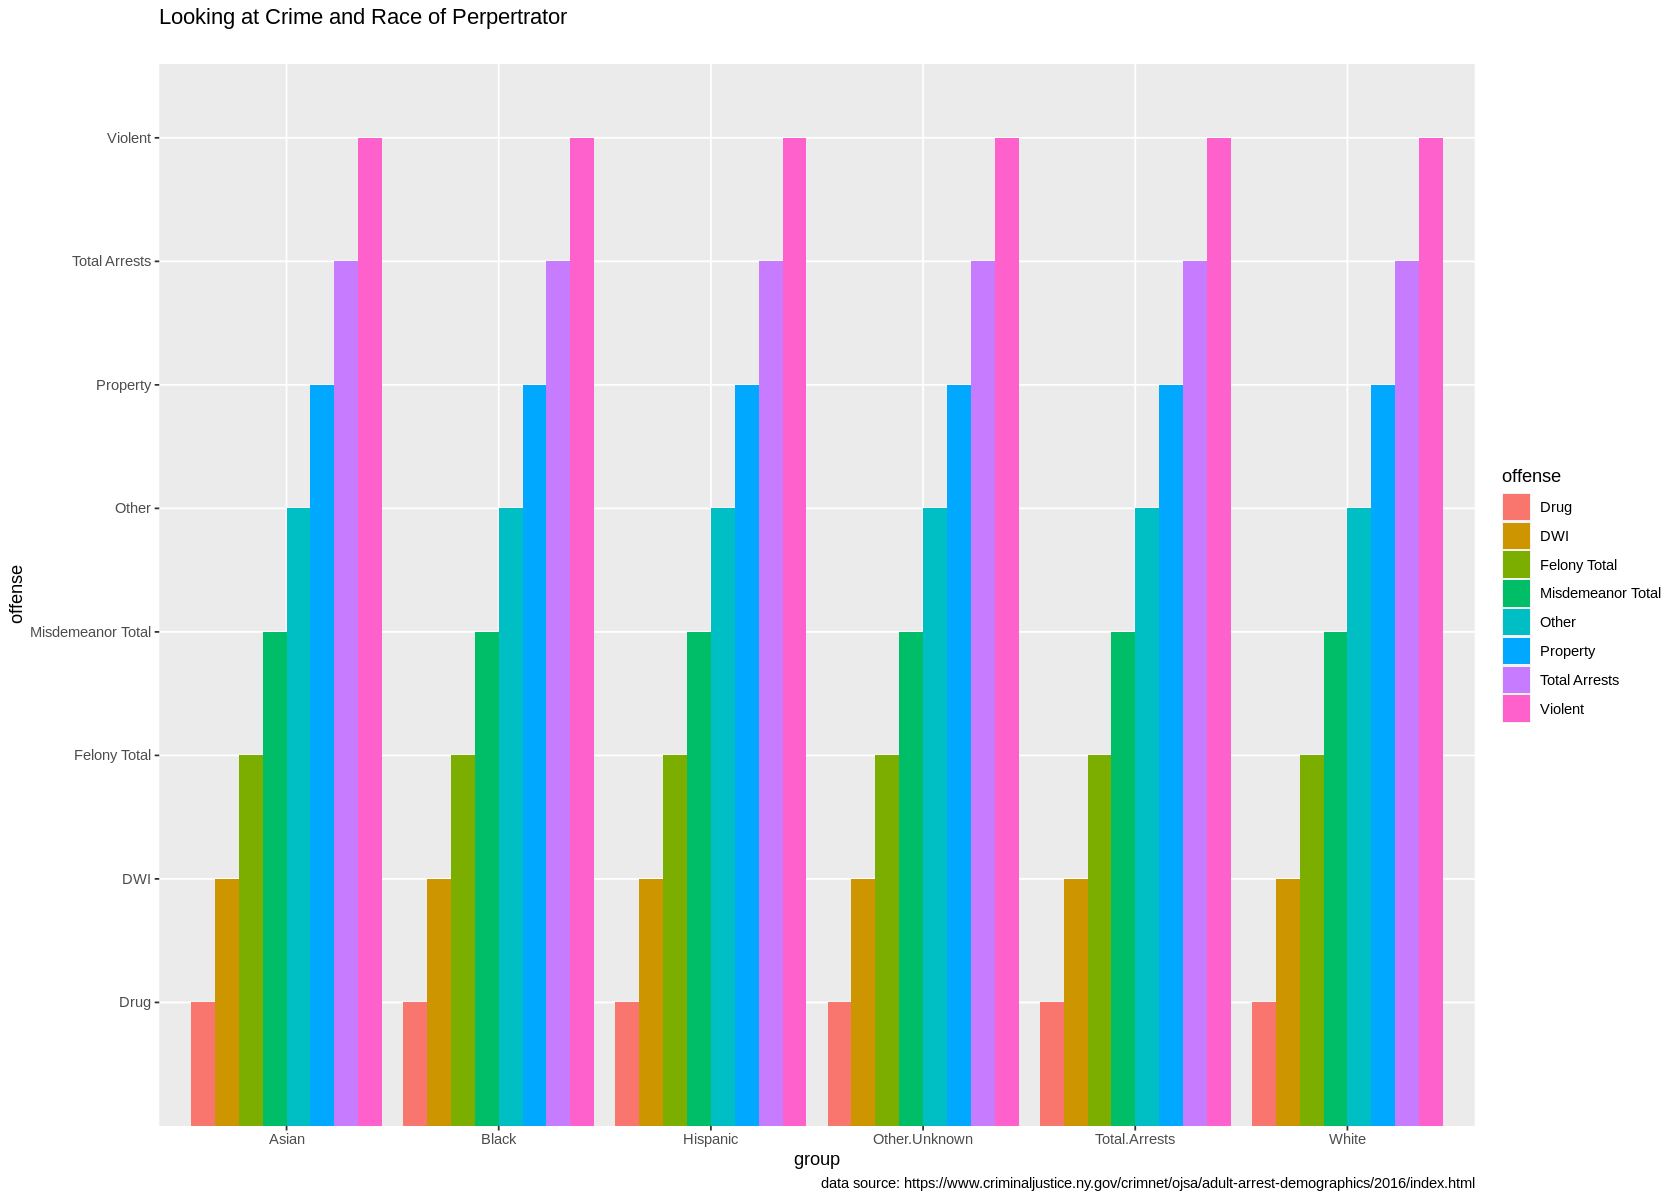

In [170]:
plot.function <- ggplot(race_long,aes(x= group, y= offense , fill = offense)) +
        geom_bar(stat = "identity", position = "dodge") +
              labs(title =  "Looking at Crime and Race of Perpertrator",
                    subtitle = "",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html") 
plot

In [87]:
str(race_long)

tibble [1,842 × 5] (S3: tbl_df/tbl/data.frame)
 $ county : chr [1:1842] "Cayuga" "Cayuga" "Cayuga" "Cayuga" ...
 $ year   : int [1:1842] 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ offense: chr [1:1842] "Total Arrests" "Total Arrests" "Total Arrests" "Total Arrests" ...
 $ group  : chr [1:1842] "Total.Arrests" "White" "Black" "Hispanic" ...
 $ number : num [1:1842] 1374 1071 240 42 2 ...


## Display Date for Total Arrests by Race & Ethnicity

In [100]:
#Here is an odd one.
# R colab has issues reading in csv files less than 5 rows.
# So I repeated the last line multiple times and will later drop them.

totals_by_race <- read.csv("/content/CGR_totals_by_race_long - Sheet1.csv")

In [101]:
totals_by_race

Race,Arrests
<chr>,<int>
Asian,1734
Black,78014
Hispanic,18007
OtherUnknown,2232
White,130744
Asian,1734
Black,78014
Hispanic,18007
OtherUnknown,2232


In [102]:
totals_by_race <- unique(totals_by_race)

In [103]:
totals_by_race

,Race,Arrests
,<chr>,<int>
1,Asian,1734
2,Black,78014
3,Hispanic,18007
4,OtherUnknown,2232
5,White,130744


In [104]:
str(totals_by_race)

'data.frame':	5 obs. of  2 variables:
 $ Race   : chr  "Asian" "Black" "Hispanic" "OtherUnknown" ...
 $ Arrests: int  1734 78014 18007 2232 130744


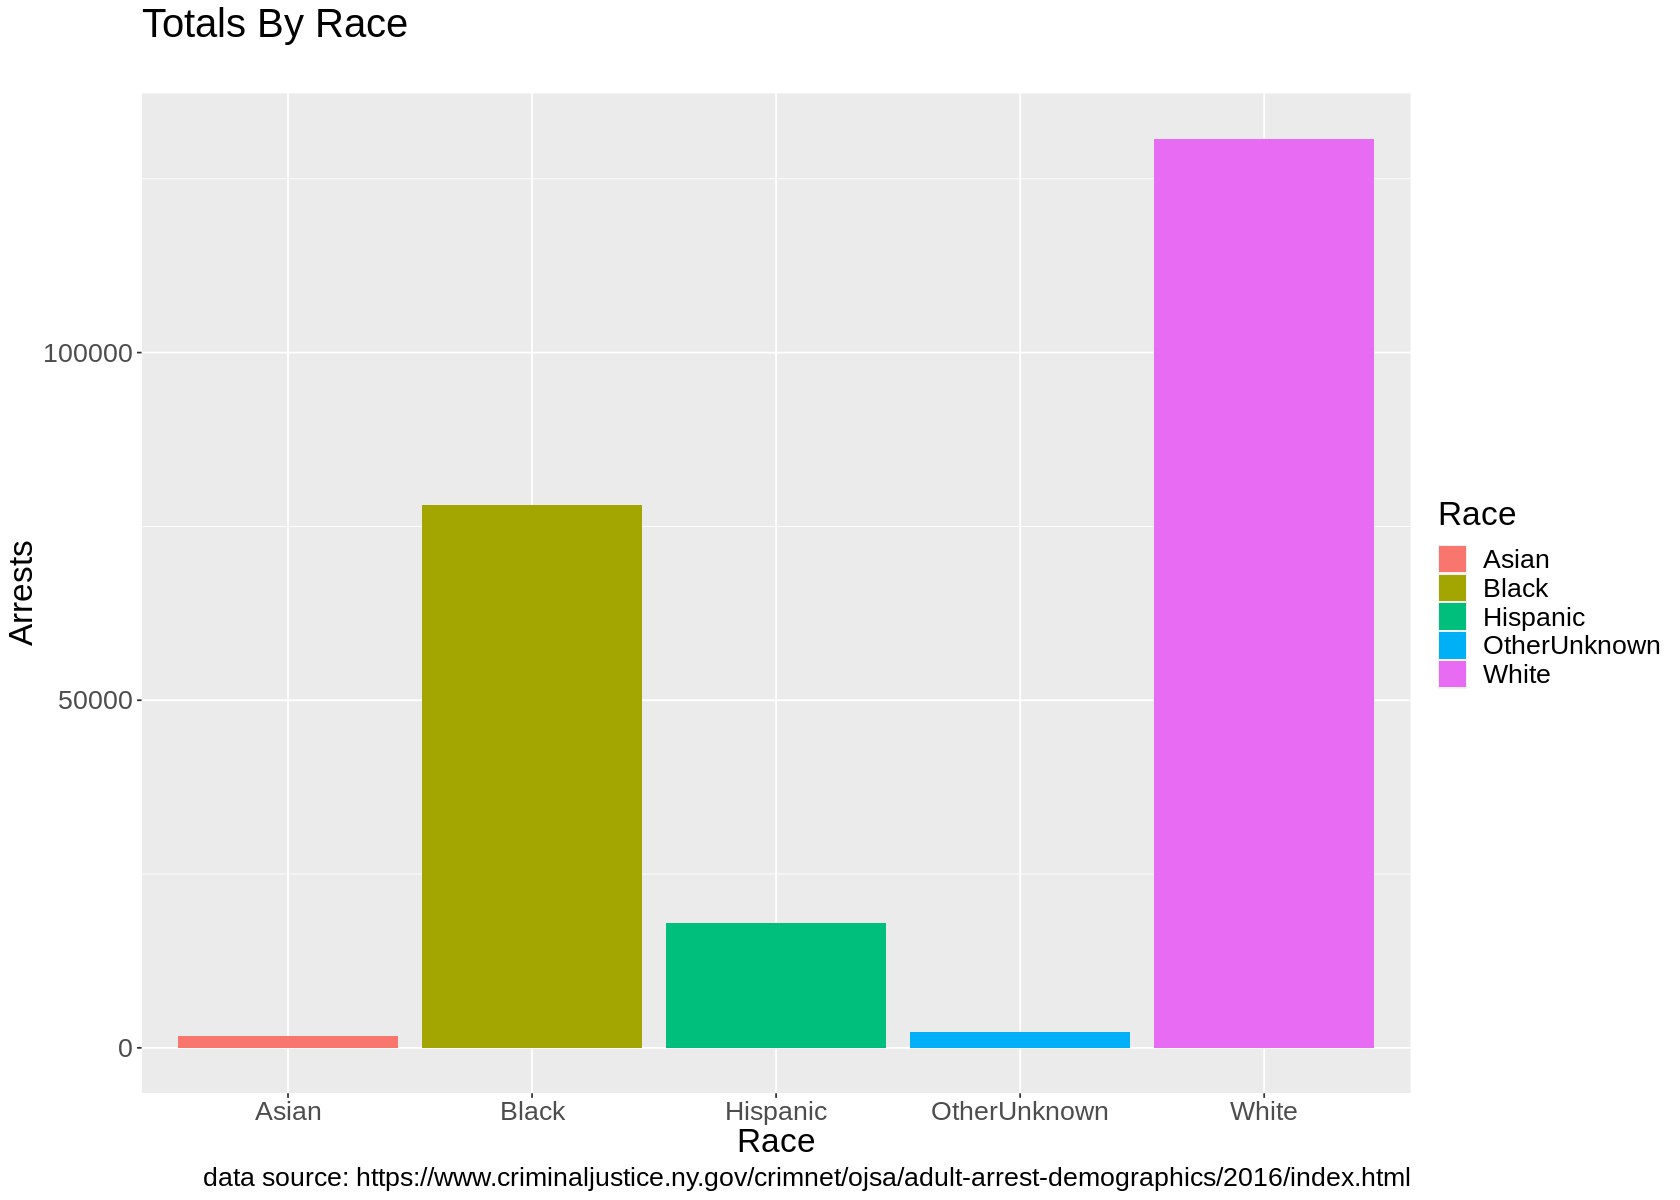

In [109]:
Totals_by_race_Bar <- ggplot(totals_by_race , aes(x= Race, y = Arrests , fill = Race)) +
                  geom_bar(stat = "identity", position = "dodge") +
              labs(title =  "Totals By Race",
                    subtitle = "",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html") +
                    theme(text = element_text(size = 20))  
Totals_by_race_Bar

# Change Over Time

We are looking at very small communities and consequently very small numbers of crimes.   There are  many  zeros.  If a community had 0 murders in 2016 and 1 in 2019 what is the percentage increase?  Becasue of the impossibility of dividing  a number by zero we will instead look at the absolute change.  In the example above the change would simply be 1. 

In [111]:
RaceTimeCrime <- read.csv("/content/CGR_Crime_Race_Time - Sheet1.csv")
head(RaceTimeCrime)

,county,Offense,Change_Totals,White_Change,Black_Change,Hispanic_Change,Asian_Change,Other_Unknown_Chang
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,Cayuga,Total Arrests,-133,-146,14,14,-1,-14
2,Cayuga,Felony Total,-20,-54,20,13,0,1
3,Cayuga,Drug,15,4,7,4,0,0
4,Cayuga,Violent,-44,-42,-4,1,0,1
5,Cayuga,DWI,-13,-11,-2,1,0,-1
6,Cayuga,Other,22,-5,19,7,0,1


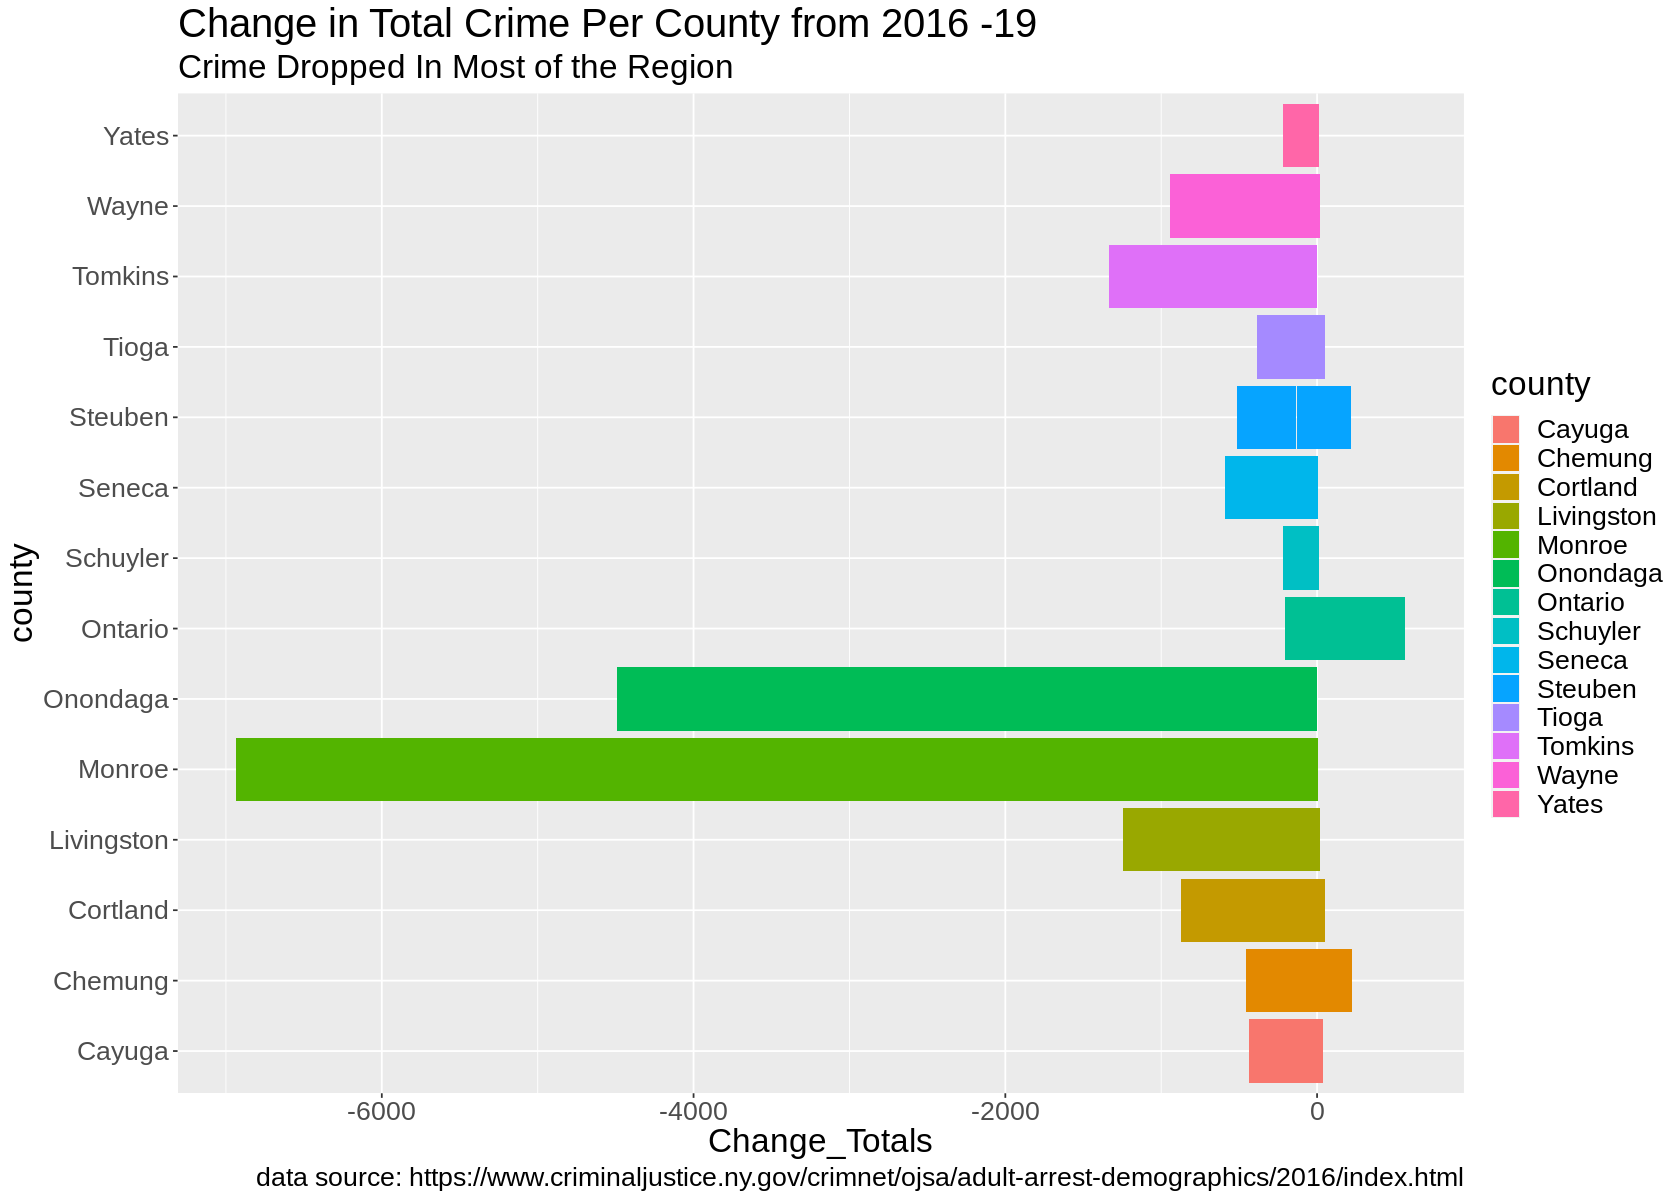

In [119]:
Plot_1 <- ggplot(RaceTimeCrime, aes(x= county, y = Change_Totals, fill = county)) +
          geom_bar(stat = "identity")+
          coord_flip()+
           labs(title =  "Change in Total Crime Per County from 2016 -19",
                    subtitle = "Crime Dropped In Most of the Region",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html") +
                    theme(text = element_text(size = 20))  

Plot_1

## stacked bar chart of make up of crime in each county

Side by side plot per county of total crime Number

In [ ]:
#Gender_by_County_Stacked <- ggplot(data= Gender_by_County , 
                            aes(x = county , y = Total.Arrests , fill = gender)) +
                            geom_bar(stat =  "identity") +
                            labs(title =  "2019: Proprtion of Arrests By Gender In Each county",
                    subtitle = "",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html") +
                    theme(text = element_text(size = 15)) 
Gender_by_County_Stacked 

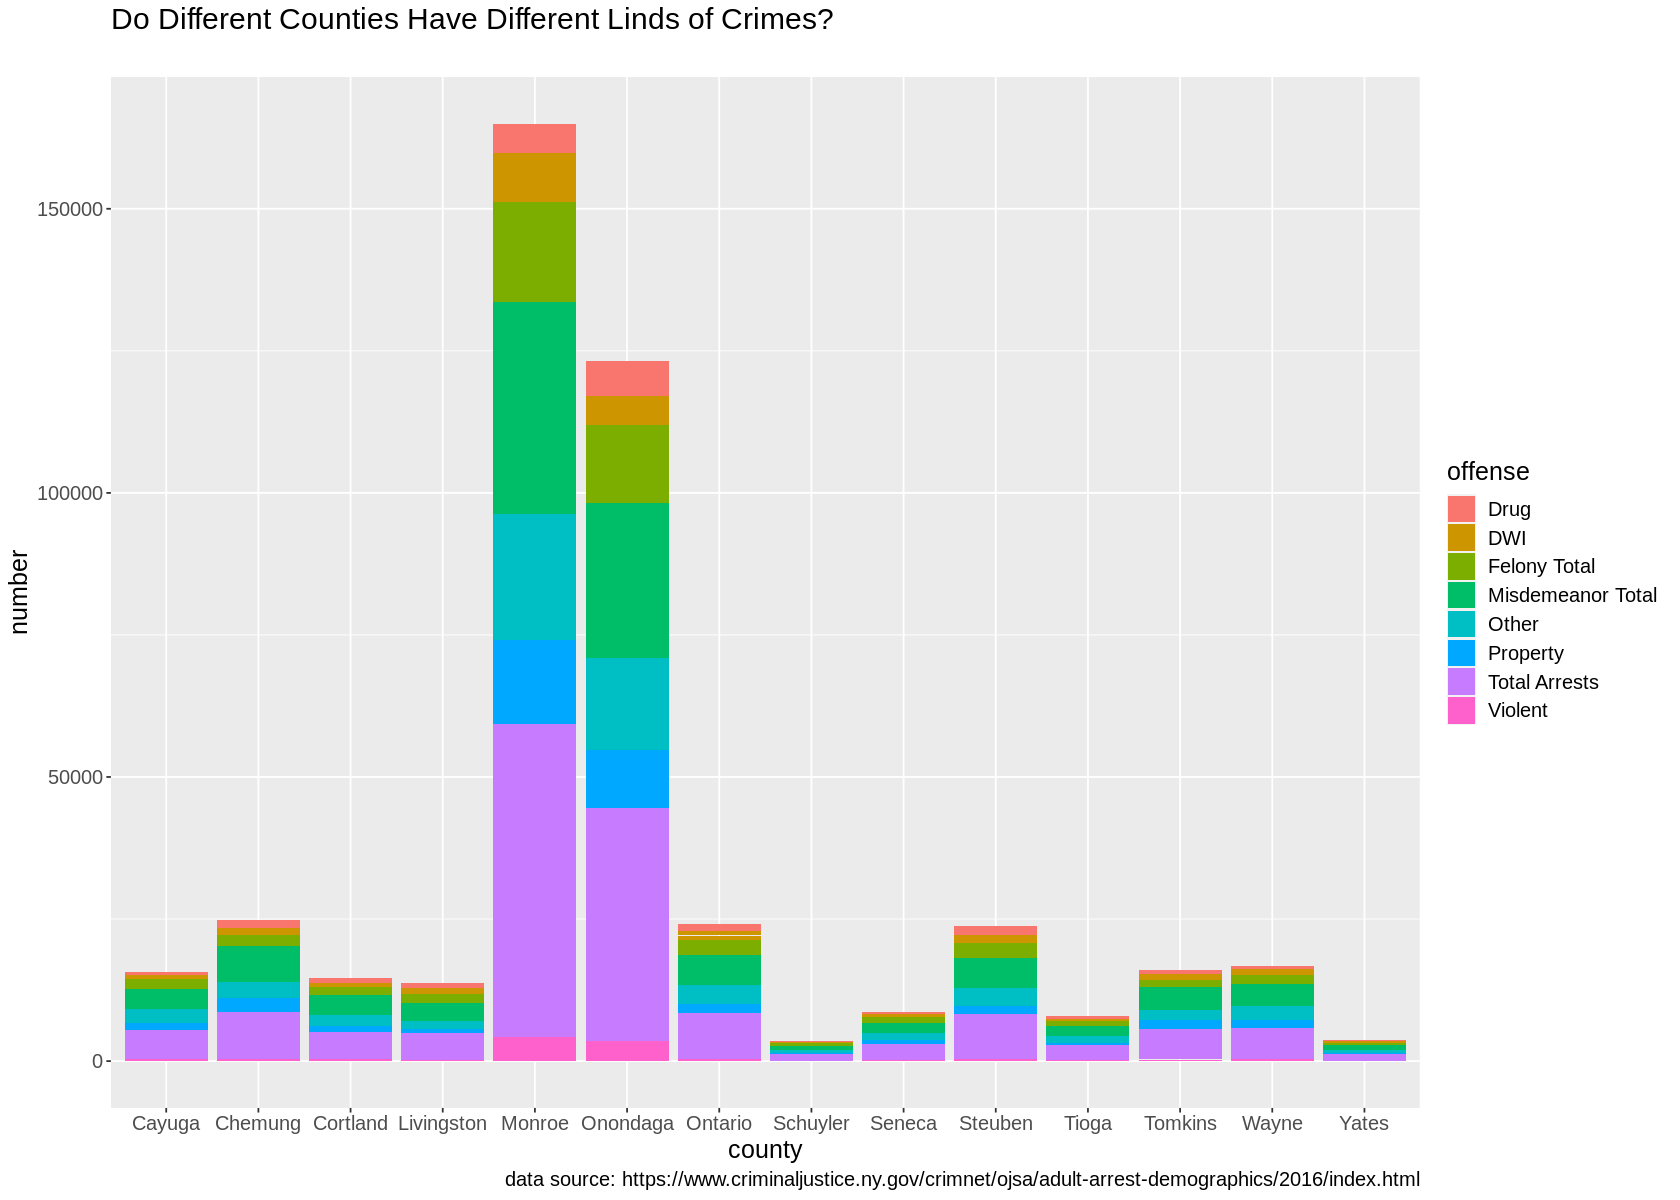

In [202]:
B<- ggplot(race_long , aes(x= county ,y= number , fill = offense))+
            geom_bar(stat =  "identity") +
                            labs(title =  "Do Different Counties Have Different Linds of Crimes?",
                    subtitle = "",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html") +
                    theme(text = element_text(size = 15))

B

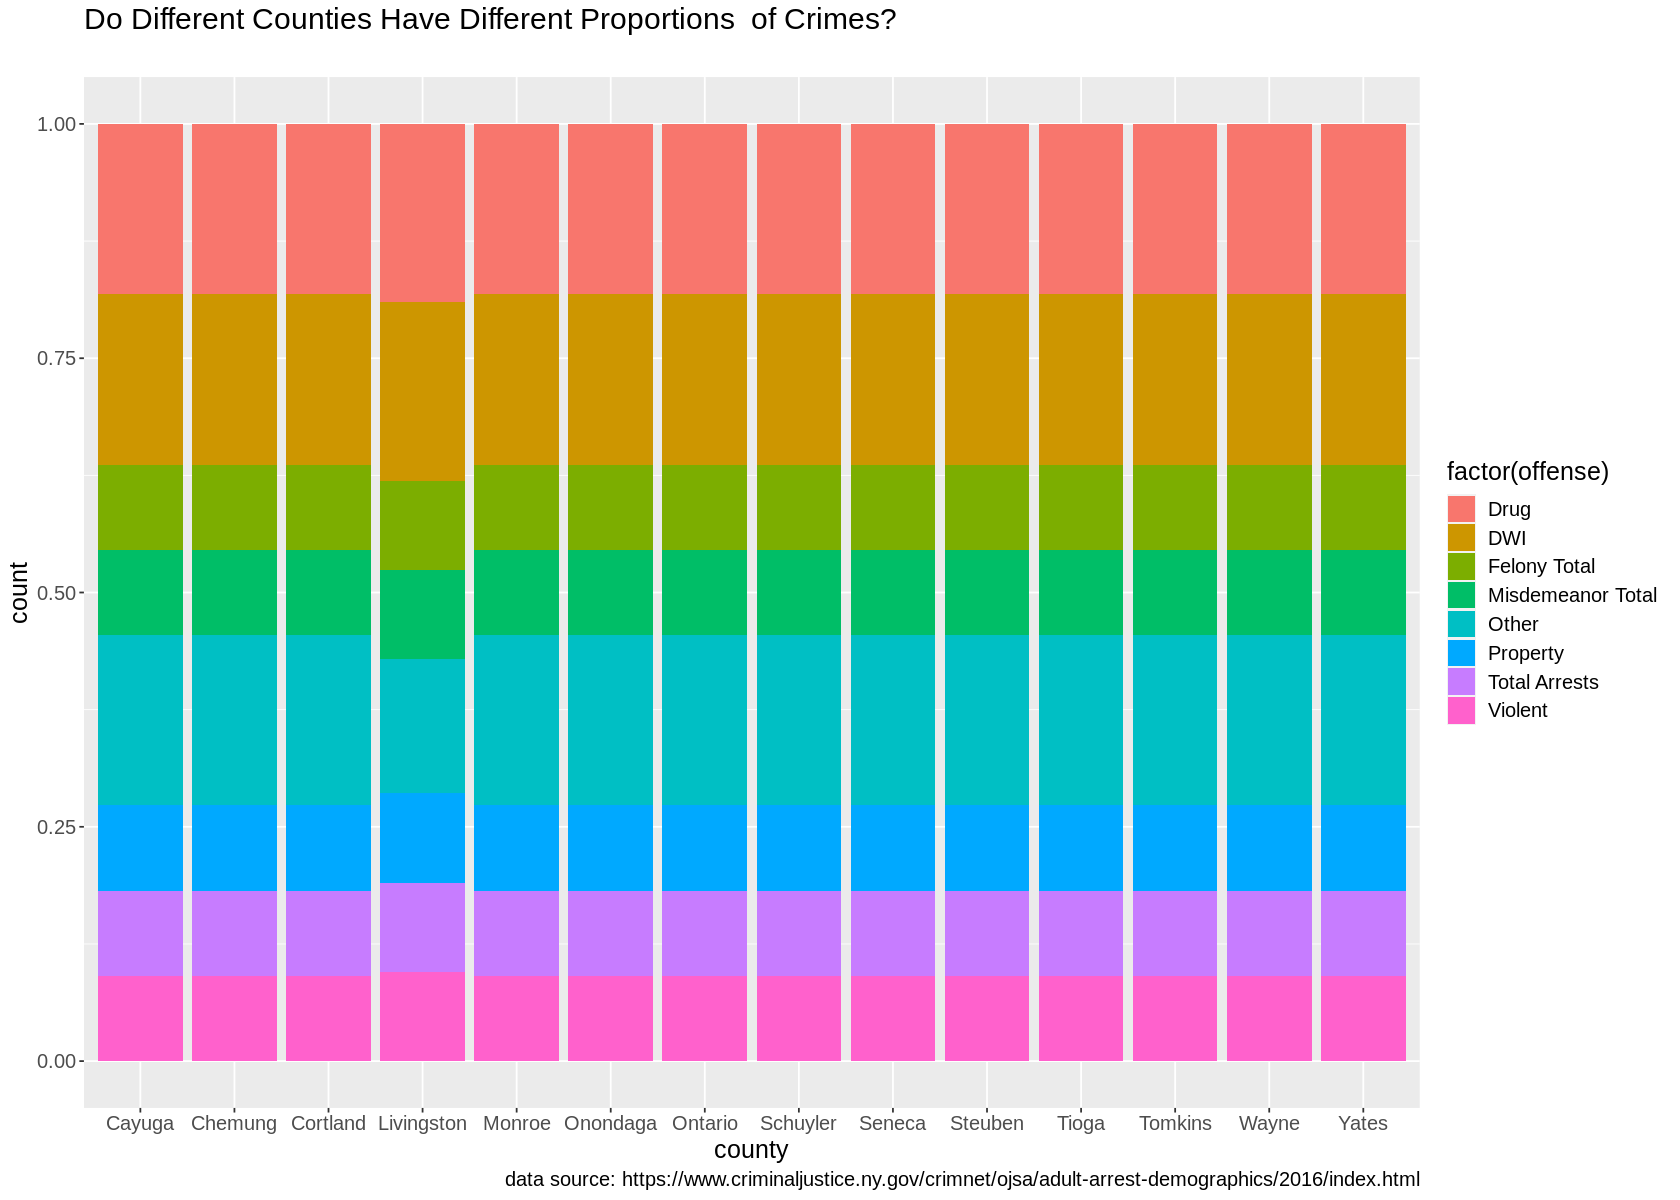

In [212]:
C <- ggplot(race_long , aes(x= county , fill = factor(offense)))+
            geom_bar(position  =  "fill") +
                            labs(title =  "Do Different Counties Have Different Proportions  of Crimes?",
                    subtitle = "",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html") +
                    theme(text = element_text(size = 15))

C

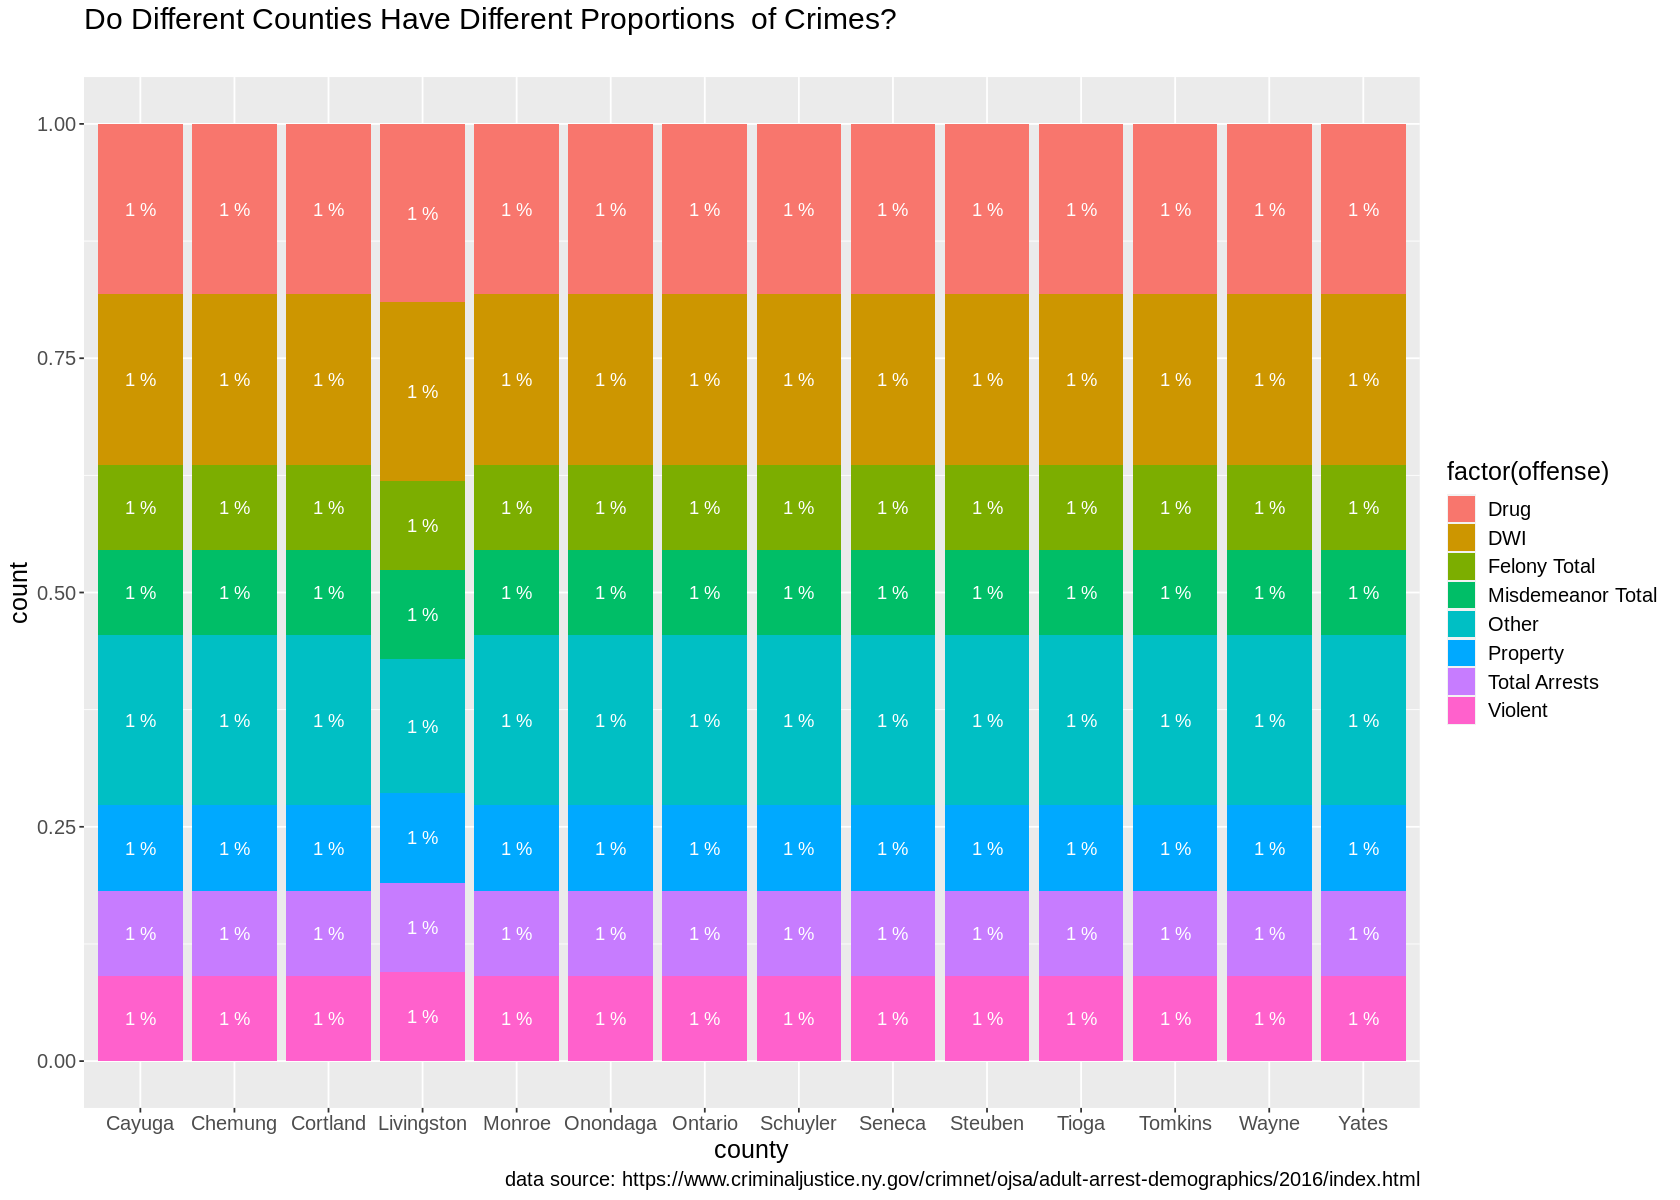

In [211]:
D <- ggplot(race , aes(x= county , fill = factor(offense)))+
            geom_bar(position  =  "fill") +
            stat_count(geom = "text", 
             aes(label = paste(round((..count..)/sum(..count..)*100), "%")),
             position=position_fill(vjust=0.5), colour="white")+
                            labs(title =  "Do Different Counties Have Different Proportions  of Crimes?",
                    subtitle = "",
                    caption = "data source: https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2016/index.html") +
                    theme(text = element_text(size = 15))

D

In [210]:
head(race)

,county,year,offense,Total.Arrests,White,Black,Hispanic,Asian,Other.Unknown
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,Cayuga,2016,Total Arrests,1374,1071,240,42,2,19
2,Cayuga,2016,Felony Total,431,325,92,12,0,2
3,Cayuga,2016,Drug,51,33,16,1,0,1
4,Cayuga,2016,Violent,104,79,24,1,0,0
5,Cayuga,2016,DWI,38,33,4,0,0,1
6,Cayuga,2016,Other,238,180,48,10,0,0
